# Idalia

## imports

importing stuff

In [229]:
from typing import Tuple

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy import interpolate
from microSWIFTtelemetry import pull_telemetry_as_var
import pickle
import colorcet as cc

#xs, _ = np.meshgrid(np.linspace(0, 1, 80), np.linspace(0, 1, 10))
#plt.imshow(xs, cmap=cc.cm.colorwheel);  # use tab completion to choose



#test




## getting data

In [230]:
def concatenate_drifters(drifter_dict: dict) -> pd.DataFrame:
    """
    Concatenate a dictionary of individual drifter DataFrames into a single,
    multi-index DataFrame.  Drop the observations that do not contain waves
    (remove off-hour pressure and temperature observations).

    Args:
        drifter_dict (dict): individual drifter DataFrames keyed by id.

    Returns:
        DataFrame: concatenated drifters
    """
    drifter_df = (
        pd.concat(drifter_dict, names=['id', 'time'])
        .dropna(subset='energy_density')
    )
    return drifter_df

DRIFTER_DATA_PATH = './hurricane_idalia_drifter_data_v3.pickle'

with open(DRIFTER_DATA_PATH, 'rb') as handle:
    drifter_data = pickle.load(handle)

# Concatenate the indivudal drifter DataFrames by type
microswift_df = concatenate_drifters(drifter_data['microswift'])
dwsd_df = concatenate_drifters(drifter_data['dwsd'])
spotter_df = concatenate_drifters(drifter_data['spotter'])



# Create a drifter type column
microswift_df['drifter_type'] = 'microswift'
dwsd_df['drifter_type'] = 'dwsd'
spotter_df['drifter_type'] = 'spotter'

# Combine all drifters into a single DataFrame.
drifter_df = (pd.concat([microswift_df, dwsd_df, spotter_df])
              .sort_index(level=['id', 'time'], ascending=True))

drifter_df = drifter_df.loc[drifter_df.latitude >= 27]

In [231]:
drifter_wind_variables_df = pd.read_pickle(r'drifter_wind_variables_df.pickle')

In [232]:
drifter_df = drifter_df.join(drifter_wind_variables_df)

### data points at given times 

In [233]:

# # Data summary:
# #drifter_df.loc[drifter].info()
# # Get the data
# start_date = pd.Timestamp('2023-08-29 12:00Z')
# end_date = pd.Timestamp('2023-08-31 00:00Z')
# buoy_id = '048'
# #create list of bout id numbers and loop through
# drifter_df, errors_df = pull_telemetry_as_var(
#     buoy_id,
#     start_date=start_date,
#     end_date=end_date,
#     var_type='pandas',
# )

# Data summary:
# drifter_df.info()

IBTRACS_BASE_URL = ('https://www.ncei.noaa.gov/data/international-best-'
                    'track-archive-for-climate-stewardship-ibtracs/'
                    'v04r00/access/csv/')
IBTRACS_BASE_CSV = f'ibtracs.last3years.list.v04r00.csv'
IBTRACS_PATH = IBTRACS_BASE_URL + IBTRACS_BASE_CSV
ibtracs_df = pd.read_csv(IBTRACS_PATH, low_memory=False)
ibtracs_df = (ibtracs_df
    .query('NAME == "IDALIA"')
    .assign(ISO_TIME = lambda df: pd.to_datetime(df['ISO_TIME'], utc=True))
    .set_index('ISO_TIME', drop=True)
    .assign(LAT = lambda df: df['LAT'].astype(np.float64))
    .assign(LON = lambda df: df['LON'].astype(np.float64))
)

ibtracs_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 2023-08-26 12:00:00+00:00 to 2023-09-08 06:00:00+00:00
Columns: 162 entries, SID to STORM_DIR
dtypes: float64(2), int64(1), object(159)
memory usage: 132.4+ KB


In [234]:
ibtracs_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 2023-08-26 12:00:00+00:00 to 2023-09-08 06:00:00+00:00
Columns: 162 entries, SID to STORM_DIR
dtypes: float64(2), int64(1), object(159)
memory usage: 132.4+ KB


In [235]:
drifterids = drifter_df.index.get_level_values(level="id").unique()


## plotting things

###significant wave height

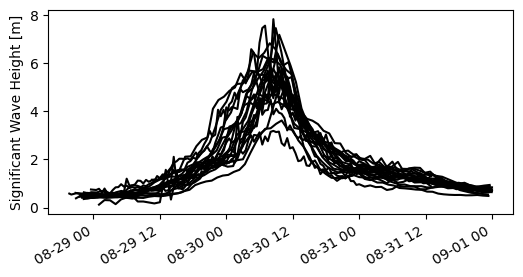

In [236]:
# Example: get the significant wave height for every microSWIFT:
drifter_df.significant_height

# Plot the significant wave height versus time:

fig, ax = plt.subplots(figsize=(6, 3))

for drifter in drifterids:
    sc = ax.plot(
        drifter_df.loc[drifter].index,  # this is how you access the times
        drifter_df.loc[drifter]['significant_height'],
        color='black',
    )
ax.set_ylabel('Significant Wave Height [m]')
fig.autofmt_xdate()



In [237]:
### significant wave height in terms of the latitude and longitude from 1 microSWIFT

In [238]:
#cmap = 'viridis'
#norm = plt.Normalize(0, 6)  # min, max


#fig, ax = plt.subplots(figsize=(5, 5))
#sc = ax.scatter(x,y,c=c,norm=norm, cmap=cmap)
#drifter_df.loc[drifter]['longitude'],
#drifter_df.loc[drifter]['latitude'],
#c=drifter_df.loc[drifter]['significant_height'],
#cmap=cmap,
#norm=norm,
##fig.colorbar(sc, ax=ax, label='Significant Wave Height [m]')
#ax.set_xlabel('Longitude')
#ax.set_ylabel('Latitude')


#plt.show()


## latitude, longitude, center of hurricane

In [239]:
#getting data



peak direction, distance from center of hurricane

In [240]:


#distance=np.sqrt((LON-longitude)**2 +(LAT-latitude)**2)

interpolation experimentation 

In [241]:
drifter_df.loc[drifter]

latitude  longitude  significant_height  \
time                                                                 
2023-08-28 22:17:31+00:00  28.87520  -84.34910               0.530   
2023-08-28 23:17:31+00:00  28.88597  -84.36055               0.484   
2023-08-29 00:17:31+00:00  28.89878  -84.36770               0.432   
2023-08-29 01:17:31+00:00  28.91407  -84.37098               0.449   
2023-08-29 02:17:31+00:00  28.93022  -84.37178               0.449   
...                             ...        ...                 ...   
2023-08-31 18:17:31+00:00  29.00087  -85.25447               0.945   
2023-08-31 20:18:24+00:00  29.01693  -85.28587               0.863   
2023-08-31 21:18:24+00:00  29.02577  -85.30423               0.847   
2023-08-31 22:18:24+00:00  29.03567  -85.32205               0.789   
2023-08-31 23:18:24+00:00  29.04548  -85.33762               0.832   

                           peak_period  peak_direction  \
time                                                     
2023-08-28 22:17:31+00:00        4.096         124.365   
2023-08-28 23:17:31+00:00        3.938         121.722   
2023-08-29 00:17:31+00:00        4.096         121.985   
2023-08-29 01:17:31+00:00        3.938         125.458   
2023-08-29 02:17:31+00:00        3.938         126.432   
...                                ...             ...   
2023-08-31 18:17:31+00:00        7.314         168.399   
2023-08-31 20:18:24+00:00        7.314         169.856   
2023-08-31 21:18:24+00:00        7.314         172.286   
2023-08-31 22:18:24+00:00        7.314         170.548   
2023-08-31 23:18:24+00:00        7.314         170.548   

                           peak_directional_spread  mean_period  \
time                                                              
2023-08-28 22:17:31+00:00                22.729826     3.353445   
2023-08-28 23:17:31+00:00                25.646812     3.264370   
2023-08-29 00:17:31+00:00                29.715524     3.130826   
2023-08-29 01:17:31+00:00                26.073086     3.043518   
2023-08-29 02:17:31+00:00                26.202213     2.988434   
...                                            ...          ...   
2023-08-31 18:17:31+00:00                19.342130     5.920365   
2023-08-31 20:18:24+00:00                21.057402     5.607473   
2023-08-31 21:18:24+00:00                21.100202     5.520342   
2023-08-31 22:18:24+00:00                22.543618     5.338056   
2023-08-31 23:18:24+00:00                20.739607     5.216048   

                           mean_direction  mean_directional_spread  \
time                                                                 
2023-08-28 22:17:31+00:00      123.703761                39.622769   
2023-08-28 23:17:31+00:00      124.557940                40.210313   
2023-08-29 00:17:31+00:00      125.547444                43.967229   
2023-08-29 01:17:31+00:00      130.434860                42.434815   
2023-08-29 02:17:31+00:00      133.951830                42.842480   
...                                   ...                      ...   
2023-08-31 18:17:31+00:00      171.422326                36.882235   
2023-08-31 20:18:24+00:00      173.817932                40.283795   
2023-08-31 21:18:24+00:00      175.886057                38.942834   
2023-08-31 22:18:24+00:00      176.289927                40.142634   
2023-08-31 23:18:24+00:00      176.046283                37.160988   

                                                                   frequency  \
time                                                                           
2023-08-28 22:17:31+00:00  [0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...   
2023-08-28 23:17:31+00:00  [0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...   
2023-08-29 00:17:31+00:00  [0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...   
2023-08-29 01:17:31+00:00  [0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...   
2023-08-29 02:17:31+00:00  [0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...   
...               

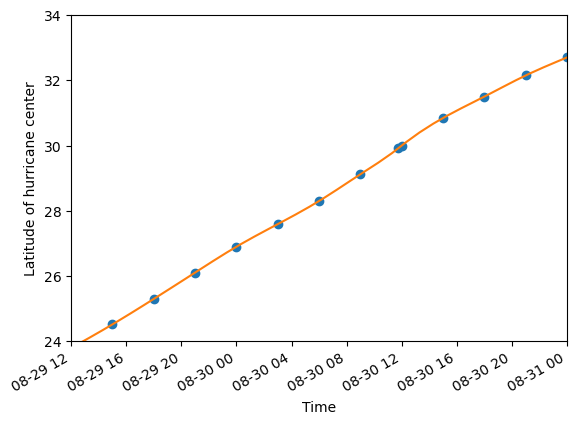

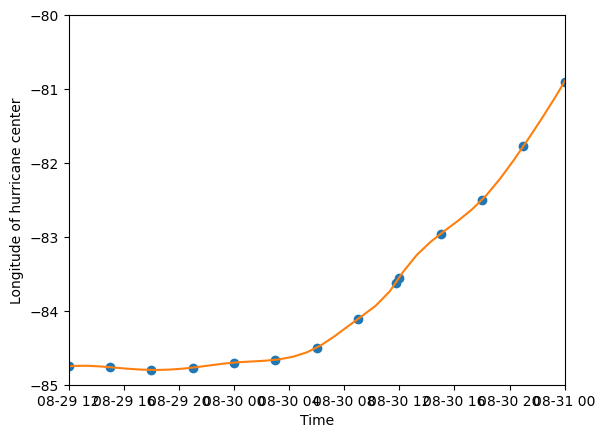

In [242]:
#x -85, -83
#y 28, 30

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

for drifter in drifterids:
    
    # latitude interpolation
    x = ibtracs_df.index
    y = ibtracs_df['LAT']
    f = interpolate.interp1d(pd.to_numeric(x), y, kind="cubic")
    latxnew = drifter_df.loc[drifter].index #correspond to the microswift times
    latynew = f(pd.to_numeric(latxnew))   # use interpolation function returned by `interp1d`
   
    # Longiutude interpolation
    x = ibtracs_df.index
    y = ibtracs_df['LON']
    f = interpolate.interp1d(pd.to_numeric(x), y, kind="cubic")
    lonxnew = drifter_df.loc[drifter].index #correspond to the microswift times
    lonynew = f(pd.to_numeric(lonxnew))   # use interpolation function returned by `interp1d`
   
    #rmw interpolation
    x = ibtracs_df.index
    y = ibtracs_df['USA_RMW']
    f = interpolate.interp1d(pd.to_numeric(x), y, kind="cubic")
    rmwxnew = drifter_df.loc[drifter].index #correspond to the microswift times
    rmwynew = f(pd.to_numeric(rmwxnew))   # use interpolation function returned by `interp1d`

    # Assign to dataframe
    drifter_df.loc[drifter, 'stormlatitude']=latynew
    drifter_df.loc[drifter, 'stormlongitude']=lonynew
    drifter_df.loc[drifter, 'stormrmwkm']=rmwynew * 1.852
    
# Plot latitude
x = ibtracs_df.index
y = ibtracs_df['LAT']
fig, ax = plt.subplots()
ax.plot(x, y, 'o', latxnew, latynew, '-')
ax.set_xlabel('Time')
ax.set_ylabel('Latitude of hurricane center')
ax.set_ylim([24, 34])
ax.set_xlim([pd.Timestamp('2023-08-29 12:00Z'), pd.Timestamp('2023-08-31 00:00Z')])
fig.autofmt_xdate()
plt.show()

# Plot longitude 
x = ibtracs_df.index
y = ibtracs_df['LON']

fig, ax = plt.subplots()
ax.plot(x, y, 'o', lonxnew, lonynew, '-')
ax.set_xlabel('Time')
ax.set_ylabel('Longitude of hurricane center')
ax.set_ylim([-85, -80])
ax.set_xlim([pd.Timestamp('2023-08-29 12:00Z'), pd.Timestamp('2023-08-31 00:00Z')])
plt.show()

graphing microswift positions in relation to hurricane center

#latitudes and longitudes

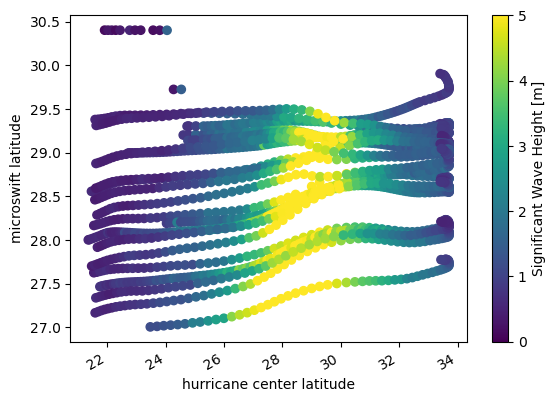

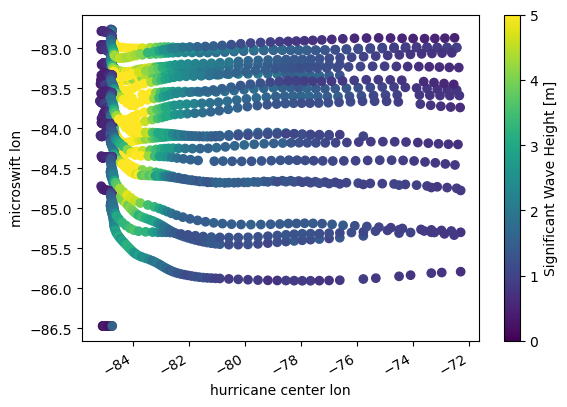

In [243]:
fig, ax = plt.subplots()
#put higher switch variables
norm = plt.Normalize(0, 5)  # min, max
cmap = 'viridis'
for drifter in drifterids:
    x = drifter_df.loc[drifter]['stormlatitude']
    y = drifter_df.loc[drifter]['latitude']
    c = drifter_df.loc[drifter]['significant_height']
    sc = ax.scatter(x,y,c=c,norm=norm, cmap=cmap)

 

ax.set_xlabel('hurricane center latitude')
ax.set_ylabel('microswift latitude')
fig.autofmt_xdate()

fig.colorbar(sc, ax=ax, label='Significant Wave Height [m]')

plt.show()

fig, ax = plt.subplots()

#longitude

norm = plt.Normalize(0, 5)
for drifter in drifterids:
    x = drifter_df.loc[drifter]['stormlongitude']
    y=drifter_df.loc[drifter]['longitude']
    c=drifter_df.loc[drifter]['significant_height']
    sc = ax.scatter(x,y,c=c,norm=norm, cmap=cmap)


  # min, max
ax.set_xlabel('hurricane center lon')
ax.set_ylabel('microswift lon')
fig.autofmt_xdate()

fig.colorbar(sc, ax=ax, label='Significant Wave Height [m]')

plt.show()


#radial distance of microSWIFT from hurricane center

jake email about converting lat and lon to coordinate plane

def great_circle_pairwise(
    longitude_a: np.ndarray,
    latitude_a: np.ndarray,
    longitude_b: np.ndarray,
    latitude_b: np.ndarray,
    earth_radius: float = 6378.137,
    mod_bearing: bool = True
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Computes the great circle distance (km) and true fore bearing (deg) between
    pairs of observations in input arrays `longitude_a` and `longitude_b` and
    `latitude_a` and `latitude_b`.

    For two longitude and latitude pairs, the great circle distance is the
    shortest distance between the two points along the Earth's surface. This
    distance is calculated using the Haversine formula. The instances in
    `longitude_a` and `latitude_a` are designated as point `a`; the instances
    in `longitude_b` and `latitude_b` then form point `b`. The true fore
    bearing is the bearing, measured from true north, of `b` as seen from `a`.

    Note:
        When given `latitude_a/b` and `longitude_a/b` of shape (n,), n > 1,
        the great circle distance and fore bearing will be calculated between
        `a` and `b` entries such that the returned arrays will be of shape
        (n,). To compute the great circle distance and bearings between
        adjacent coordinates of single longitude and latitude arrays (i.e.,
        along a trajectory), use `great_circle_pathwise`.

    Args:
        longitude_a (np.array): of shape (n,) in units of decimal degrees
        latitude (np.array): of shape (n,) in units of decimal degrees
        earth_radius (float, optional): earth's radius in units of km. Defaults to 6378.137 km (WGS-84)
        mod_bearing (bool, optional): return bearings modulo 360 deg. Defaults to True.

    Returns:
        Tuple[np.array, np.array]: great circle distances (in km) and true fore
        bearings between adjacent longitude and latitude pairs; shape (n,)

    Example: A trajectory along the Earth's equator.
    ```
    >> #TODO:
    ```
    """
    # Convert decimal degrees to radians
    longitude_a_rad, latitude_a_rad = map(np.radians, [longitude_a, latitude_a])
    longitude_b_rad, latitude_b_rad = map(np.radians, [longitude_b, latitude_b])

    # Difference longitude and latitude
    longitude_difference = longitude_b_rad - longitude_a_rad
    latitude_difference = latitude_b_rad - latitude_a_rad

    # Haversine formula
    a_1 = np.sin(latitude_difference / 2) ** 2
    a_2 = np.cos(latitude_a_rad)
    a_3 = np.cos(latitude_b_rad)
    a_4 = np.sin(longitude_difference / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a_1 + a_2 * a_3 * a_4))
    distance_km = earth_radius * c

    # True bearing
    bearing_num = np.cos(latitude_b_rad) * np.sin(-longitude_difference)
    bearing_den_1 = np.cos(latitude_a_rad) * np.sin(latitude_b_rad)
    bearing_den_2 = - np.sin(latitude_a_rad) * np.cos(latitude_b_rad) * np.cos(longitude_difference)
    bearing_deg = -np.degrees(np.arctan2(bearing_num, bearing_den_1 + bearing_den_2))

    if mod_bearing:
        bearing_deg = bearing_deg % 360

    return distance_km, bearing_deg

In [244]:
#y=np.sqrt(np.square(drifter_df.loc[drifter]['longitude']-lonynew)+np.square(drifter_df.loc[drifter]['latitude']-latynew))
def great_circle_pairwise(
    longitude_a: np.ndarray,
    latitude_a: np.ndarray,
    longitude_b: np.ndarray,
    latitude_b: np.ndarray,
    earth_radius: float = 6378.137,
    mod_bearing: bool = True
) -> Tuple[np.ndarray, np.ndarray]:
       # Convert decimal degrees to radians
    longitude_a_rad, latitude_a_rad = map(np.radians, [longitude_a, latitude_a])
    longitude_b_rad, latitude_b_rad = map(np.radians, [longitude_b, latitude_b])

    # Difference longitude and latitude
    longitude_difference = longitude_b_rad - longitude_a_rad
    latitude_difference = latitude_b_rad - latitude_a_rad

    # Haversine formula
    a_1 = np.sin(latitude_difference / 2) ** 2
    a_2 = np.cos(latitude_a_rad)
    a_3 = np.cos(latitude_b_rad)
    a_4 = np.sin(longitude_difference / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a_1 + a_2 * a_3 * a_4))
    distance_km = earth_radius * c

    # True bearing
    bearing_num = np.cos(latitude_b_rad) * np.sin(-longitude_difference)
    bearing_den_1 = np.cos(latitude_a_rad) * np.sin(latitude_b_rad)
    bearing_den_2 = - np.sin(latitude_a_rad) * np.cos(latitude_b_rad) * np.cos(longitude_difference)
    bearing_deg = -np.degrees(np.arctan2(bearing_num, bearing_den_1 + bearing_den_2))

    if mod_bearing:
        bearing_deg = bearing_deg % 360

    return distance_km, bearing_deg


drifter_df['storm_distance'], drifter_df['storm_bearing'] = great_circle_pairwise(
    longitude_a = drifter_df['stormlongitude'],
    latitude_a = drifter_df['stormlatitude'],
    longitude_b = drifter_df['longitude'],
    latitude_b = drifter_df['latitude'],
    earth_radius = 6378.137,
    mod_bearing = True
)


plotting distance from hurricane center

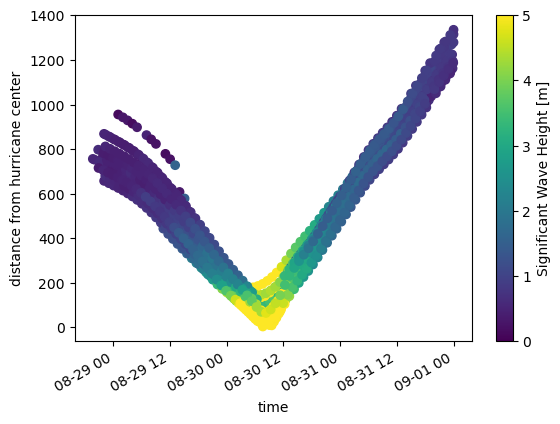

In [245]:
fig, ax = plt.subplots()

for drifter in drifterids:

    x = drifter_df.loc[drifter].index
    y = drifter_df.loc[drifter].storm_distance
    c = drifter_df.loc[drifter]['significant_height']
    sc = ax.scatter(x,y,c=c,norm=norm, cmap=cmap)

cmap = 'viridis'
norm = plt.Normalize(0, 5)  # min, max

ax.set_xlabel('time')
ax.set_ylabel('distance from hurricane center')
fig.autofmt_xdate()

fig.colorbar(sc, ax=ax, label='Significant Wave Height [m]')

plt.show()

In [246]:
#against hypothesis for single buoey, maybe make dots smaller


#figuring out storm direction

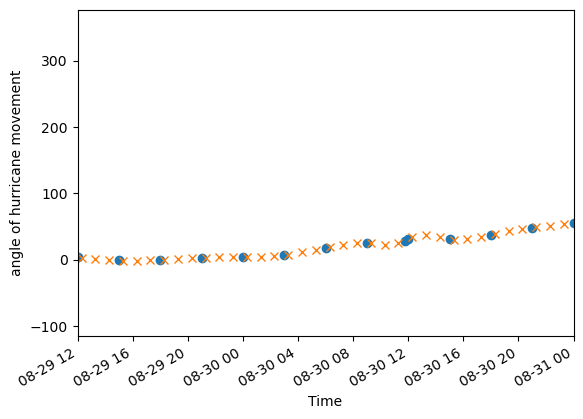

In [247]:


y = np.unwrap(pd.to_numeric(ibtracs_df.STORM_DIR), period=360)
x = ibtracs_df.index
interp_func = interpolate.interp1d(pd.to_numeric(x), y, kind="cubic")

for drifter in drifterids:
    xnew = drifter_df.loc[drifter].index
    ynew = interp_func(pd.to_numeric(xnew))
    drifter_df.loc[drifter,'storm_direction'] = ynew % 360
#ibtracs_df.index = interpolate.interp1d(pd.to_numeric(x), y, kind="cubic")
#x = drifter_df.loc[drifter].index #correspond to the microswift times
#ibtracs_df.STORM_DIR = f(pd.to_numeric(xnew))   # use interpolation function returned by `interp1d`

fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.plot(xnew, ynew, 'x')
ax.set_xlabel('Time')

ax.set_ylabel('angle of hurricane movement')
# ax.set_ylim([24, 34])
ax.set_xlim([pd.Timestamp('2023-08-29 12:00Z'), pd.Timestamp('2023-08-31 00:00Z')])
fig.autofmt_xdate()
plt.show()




In [248]:
drifter_df.storm_distance.min()

3.1546862853601776

In [249]:
anglefromstormdir = (drifter_df['storm_bearing']-drifter_df['storm_direction'])%360
xstorm = np.sin(anglefromstormdir*np.pi/180)* drifter_df.storm_distance
ystorm = np.cos(anglefromstormdir*np.pi/180)* drifter_df.storm_distance
drifter_df['anglefromstormdir'] = anglefromstormdir
drifter_df['xstorm'] = xstorm
drifter_df['ystorm'] = ystorm

In [250]:
#peak direction and storm direction

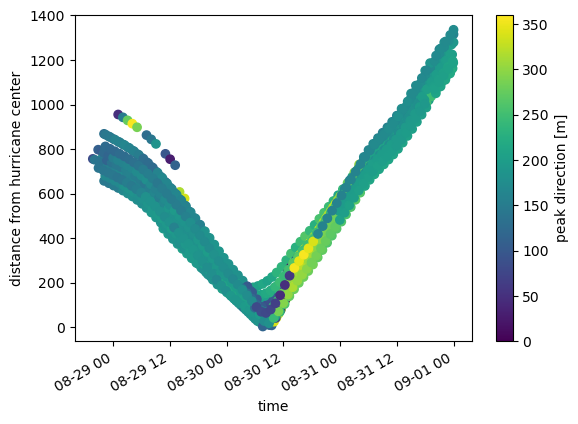

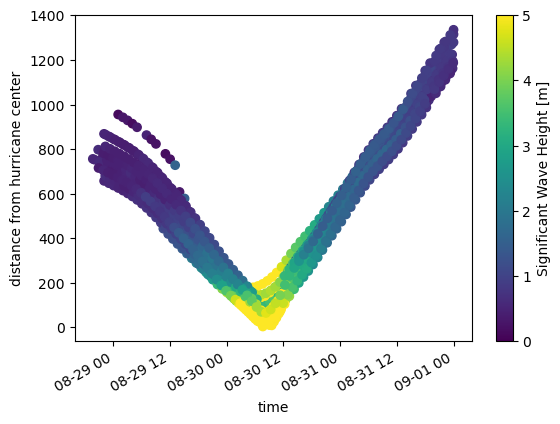

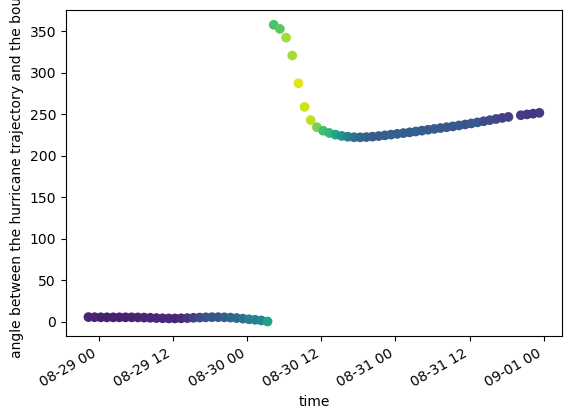

In [251]:
fig, ax = plt.subplots()
norm = plt.Normalize(0, 360)

for drifter in drifterids:
    x = drifter_df.loc[drifter].index
    y = drifter_df.loc[drifter].storm_distance
    c = drifter_df.loc[drifter]['peak_direction']
    sc = ax.scatter(x,y,c=c,norm=norm, cmap=cmap)

cmap = 'viridis'
ax.set_xlabel('time')
ax.set_ylabel('distance from hurricane center')
fig.autofmt_xdate()

fig.colorbar(sc, ax=ax, label='peak direction [m]')

plt.show()

#radial distance again
norm = plt.Normalize(0, 5)
fig, ax = plt.subplots()
for drifter in drifterids:
    x = drifter_df.loc[drifter].index
    y = drifter_df.loc[drifter].storm_distance
    c = drifter_df.loc[drifter]['significant_height']
    sc = ax.scatter(x,y,c=c,norm=norm, cmap=cmap)

cmap = 'viridis'


ax.set_xlabel('time')
ax.set_ylabel('distance from hurricane center')
fig.autofmt_xdate()

fig.colorbar(sc, ax=ax, label='Significant Wave Height [m]')

plt.show()

#radial distance but with angle from center not updated

x = drifter_df.loc[drifter].index
y = drifter_df.loc[drifter]['storm_bearing']

fig, ax = plt.subplots()
sc = ax.scatter(x,y,c=c,norm=norm)
ax.set_xlabel('time')
ax.set_ylabel('angle between the hurricane trajectory and the bouy')
fig.autofmt_xdate()


plt.show()

#plotting on coordinate plane

# angle drifter_df.loc[drifter]['bouytohurricaneangle'



#graphing wave direction in x and y

The legend is centered on the hurricanes center, with an arrow indicating its direction of motion. The color of each dot indicates the peak direction. From this we can see that the peak direction is less aligned with the wind on the right front quadrant

#graphing height in x and y

In [252]:
drifter_df.loc[drifter]

latitude  longitude  significant_height  \
time                                                                 
2023-08-28 22:17:31+00:00  28.87520  -84.34910               0.530   
2023-08-28 23:17:31+00:00  28.88597  -84.36055               0.484   
2023-08-29 00:17:31+00:00  28.89878  -84.36770               0.432   
2023-08-29 01:17:31+00:00  28.91407  -84.37098               0.449   
2023-08-29 02:17:31+00:00  28.93022  -84.37178               0.449   
...                             ...        ...                 ...   
2023-08-31 18:17:31+00:00  29.00087  -85.25447               0.945   
2023-08-31 20:18:24+00:00  29.01693  -85.28587               0.863   
2023-08-31 21:18:24+00:00  29.02577  -85.30423               0.847   
2023-08-31 22:18:24+00:00  29.03567  -85.32205               0.789   
2023-08-31 23:18:24+00:00  29.04548  -85.33762               0.832   

                           peak_period  peak_direction  \
time                                                     
2023-08-28 22:17:31+00:00        4.096         124.365   
2023-08-28 23:17:31+00:00        3.938         121.722   
2023-08-29 00:17:31+00:00        4.096         121.985   
2023-08-29 01:17:31+00:00        3.938         125.458   
2023-08-29 02:17:31+00:00        3.938         126.432   
...                                ...             ...   
2023-08-31 18:17:31+00:00        7.314         168.399   
2023-08-31 20:18:24+00:00        7.314         169.856   
2023-08-31 21:18:24+00:00        7.314         172.286   
2023-08-31 22:18:24+00:00        7.314         170.548   
2023-08-31 23:18:24+00:00        7.314         170.548   

                           peak_directional_spread  mean_period  \
time                                                              
2023-08-28 22:17:31+00:00                22.729826     3.353445   
2023-08-28 23:17:31+00:00                25.646812     3.264370   
2023-08-29 00:17:31+00:00                29.715524     3.130826   
2023-08-29 01:17:31+00:00                26.073086     3.043518   
2023-08-29 02:17:31+00:00                26.202213     2.988434   
...                                            ...          ...   
2023-08-31 18:17:31+00:00                19.342130     5.920365   
2023-08-31 20:18:24+00:00                21.057402     5.607473   
2023-08-31 21:18:24+00:00                21.100202     5.520342   
2023-08-31 22:18:24+00:00                22.543618     5.338056   
2023-08-31 23:18:24+00:00                20.739607     5.216048   

                           mean_direction  mean_directional_spread  \
time                                                                 
2023-08-28 22:17:31+00:00      123.703761                39.622769   
2023-08-28 23:17:31+00:00      124.557940                40.210313   
2023-08-29 00:17:31+00:00      125.547444                43.967229   
2023-08-29 01:17:31+00:00      130.434860                42.434815   
2023-08-29 02:17:31+00:00      133.951830                42.842480   
...                                   ...                      ...   
2023-08-31 18:17:31+00:00      171.422326                36.882235   
2023-08-31 20:18:24+00:00      173.817932                40.283795   
2023-08-31 21:18:24+00:00      175.886057                38.942834   
2023-08-31 22:18:24+00:00      176.289927                40.142634   
2023-08-31 23:18:24+00:00      176.046283                37.160988   

                                                                   frequency  \
time                                                                           
2023-08-28 22:17:31+00:00  [0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...   
2023-08-28 23:17:31+00:00  [0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...   
2023-08-29 00:17:31+00:00  [0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...   
2023-08-29 01:17:31+00:00  [0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...   
2023-08-29 02:17:31+00:00  [0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...   
...               

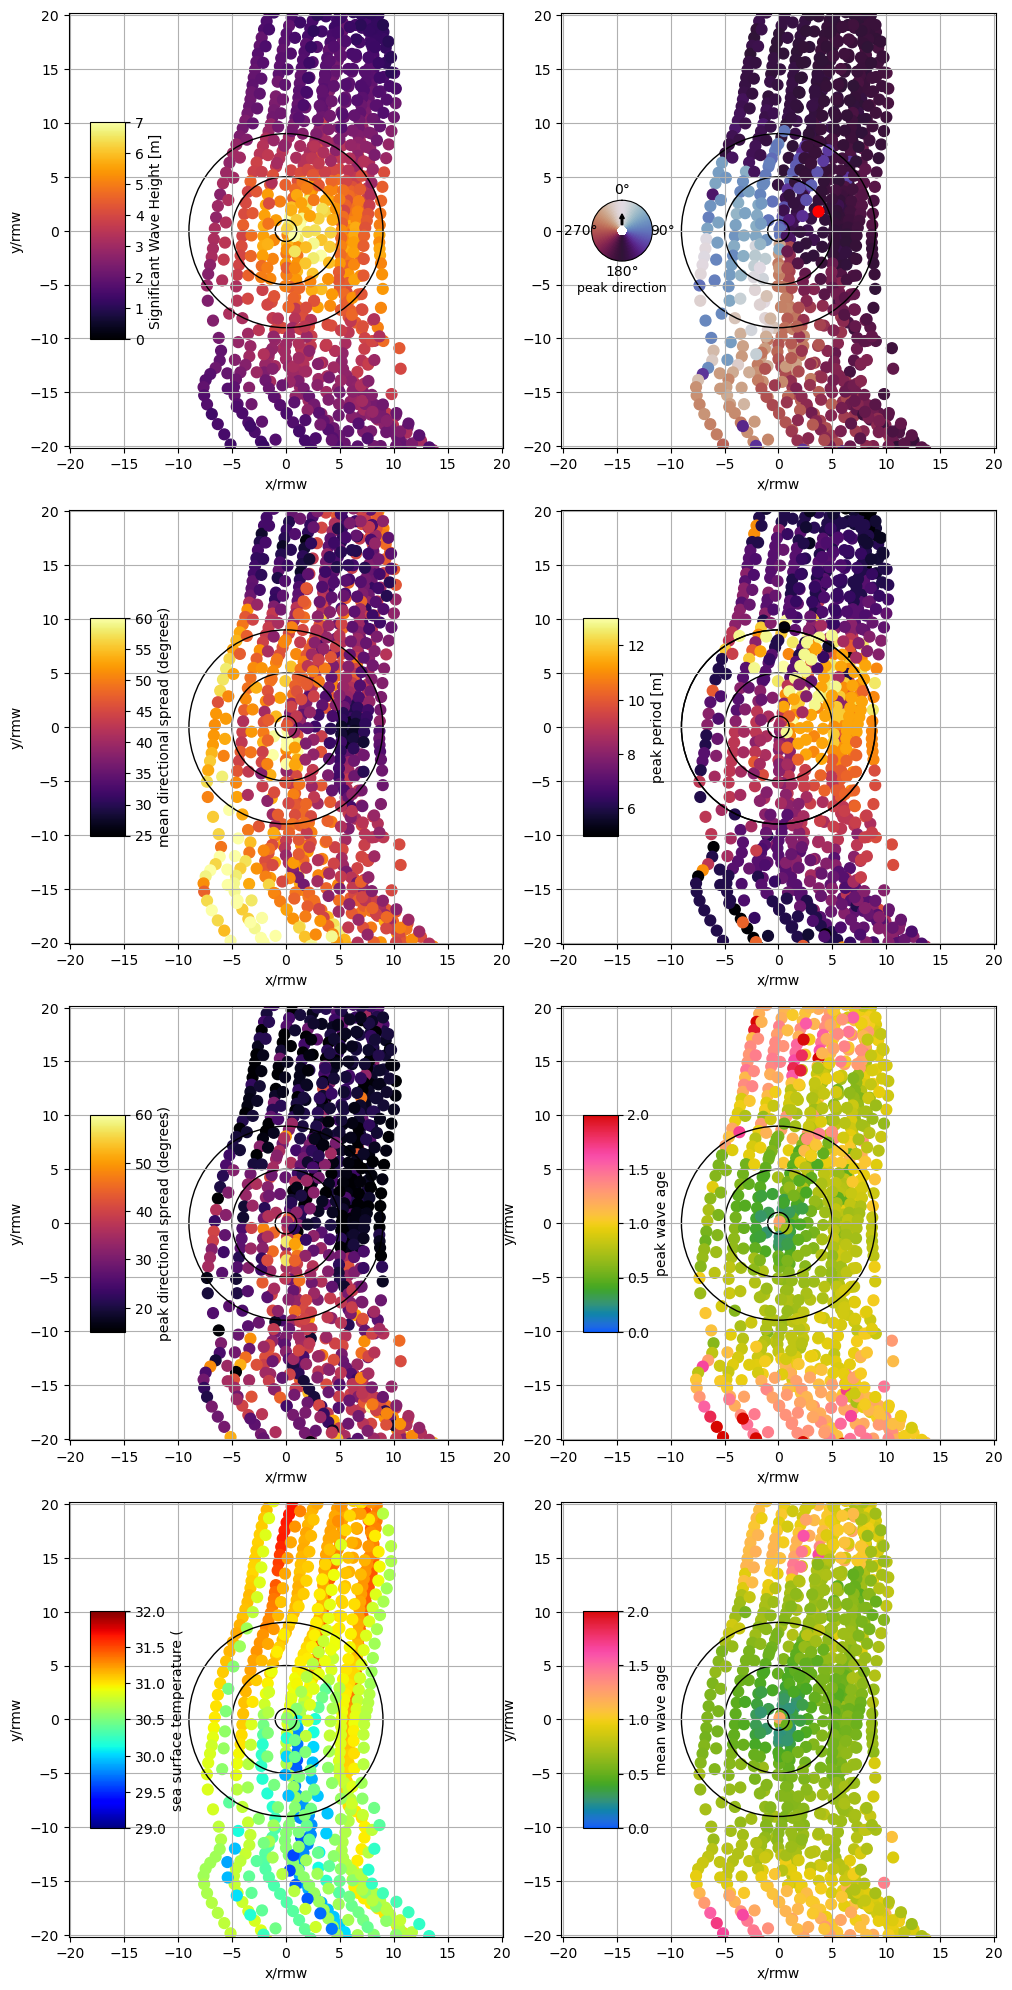

In [253]:
#rmw being constant radius

cmap = 'inferno'
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
fig.set_size_inches(10, 20)
fig.tight_layout()


start_date = pd.Timestamp('2023-08-30T00:00', tz='utc')
end_date = pd.Timestamp('2023-08-30T15:00', tz='utc')
time_slice = slice(start_date, end_date)
time_slice_no_tz = slice(start_date.tz_localize(None), end_date.tz_localize(None))
rmwkm = ibtracs_df.loc[time_slice].USA_RMW.apply(float).mean()*1.852

# first plot
# x = drifter_df.xstorm/drifter_df.stormrmwkm
# y = drifter_df.ystorm/drifter_df.stormrmwkm
x = drifter_df.xstorm/rmwkm
y = drifter_df.ystorm/rmwkm
c=drifter_df.significant_height
norm = plt.Normalize(0,7)
sc = ax[0,0].scatter(x,y,c=c, cmap=cmap, norm=norm, s=60)
ax[0,0].set_xlabel('x/rmw')
ax[0,0].set_ylabel('y/rmw')
ax[0,0].grid()
ax[0,0].set_xlim(np.array([-400, 400]) / rmwkm)
ax[0,0].set_ylim(np.array([-400, 400]) / rmwkm)
cc = mpl.patches.Circle(( 0,0),1, fill=False)
ax[0,0].set_aspect( 1 ) 
ax[0,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0),5, fill=False)
ax[0,0].set_aspect( 1 ) 
ax[0,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 9, fill=False)
ax[0,0].set_aspect( 1 ) 
ax[0,0].add_patch( cc ) 
ax_cbar = ax[0,0].inset_axes([0.05, 0.25, 0.08, 0.5])
fig.colorbar(sc, cax=ax_cbar, label='Significant Wave Height [m]')

#graph2
cmap = 'twilight'
plt.grid()
x = drifter_df.xstorm/rmwkm
y = drifter_df.ystorm/rmwkm
c=c = (drifter_df['peak_direction']-drifter_df['storm_direction'])%360
norm = mpl.colors.Normalize(vmin=0, vmax=360)
sc = ax[0,1].scatter(x,y,c=c, cmap=cmap, norm=norm, s=60)
ax[0,1].set_xlabel('x/rmw')
ax[0,1].grid()
circle=plt.Circle((0,0),100)
ax[0,1].set_xlim(np.array([-400, 400]) / rmwkm)
ax[0,1].set_ylim(np.array([-400, 400]) / rmwkm)

cc = mpl.patches.Circle(( 0,0), 1, fill=False)
ax[0,1].set_aspect( 1 ) 
ax[0,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 5, fill=False)
ax[0,1].set_aspect( 1 ) 
ax[0,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 9, fill=False)
ax[0,1].set_aspect( 1 ) 
ax[0,1].add_patch( cc ) 


legend_location = [0.07, 0.43,.14,.14]  # x, y, width, height
ax2 = ax[0,1].inset_axes(legend_location, projection='polar')
azimuths = np.arange(0, 361, 1)
zeniths = np.linspace(0.2, 1, 10)
values = azimuths * np.ones((len(zeniths), len(azimuths)))
ax2.pcolormesh(azimuths*np.pi/180.0, zeniths, values, cmap=cmap, norm=norm)
ax2.set_yticks([])
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
ax2.xaxis.grid(False)
ax2.tick_params(pad=-3,labelsize=10)
ax2.set_ylim([0, 1])
ax2.set_xticks([0, np.pi/2, np.pi])
ax2.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])

ax3 = ax[0,1].inset_axes(legend_location)
ax2.set_xlabel('peak direction', fontsize=9, labelpad=2)



arrow_kwargs = dict(  #TODO: used for RMW norm
    dx=0,
    dy=0.2,
    width=0.05,
    color='k',
    lw=1,
    head_length=0.15,
)
ax3.arrow(0, 0.2, **arrow_kwargs)
ax3.set_axis_off()
ax3.set_ylim([-1, 1])
ax3.set_xlim([-1, 1])



plt.grid()



#peak period, how fast waves go up and down
cmap = 'inferno'
x = drifter_df.xstorm/rmwkm
y = drifter_df.ystorm/rmwkm
c=drifter_df.peak_period
norm = plt.Normalize(5,13)
sc = ax[1,1].scatter(x,y,c=c, cmap=cmap, norm=norm, s=60)
ax[1,1].set_xlabel('x/rmw')
ax[1,1].grid()
ax[1,1].set_xlim(np.array([-400, 400]) / rmwkm)
ax[1,1].set_ylim(np.array([-400, 400]) / rmwkm)
cc = mpl.patches.Circle(( 0,0), 1, fill=False)
ax[1,1].set_aspect( 1 ) 
ax[1,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 5, fill=False)
ax[1,1].set_aspect( 1 ) 
ax[1,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 9, fill=False)
ax[1,1].set_aspect( 1 ) 
ax[1,1].add_patch( cc ) 

ax[1,1].set_aspect( 1 ) 
ax[1,1].add_patch( cc ) 
ax_cbar = ax[1,1].inset_axes([0.05, 0.25, 0.08, 0.5])
fig.colorbar(sc, cax=ax_cbar, label='peak period [m]')



#mean directional spread
cmap = 'inferno'
x = drifter_df.xstorm/rmwkm
y = drifter_df.ystorm/rmwkm
c=drifter_df.mean_directional_spread
norm = plt.Normalize(25,60)
sc = ax[1,0].scatter(x,y,c=c, cmap=cmap, norm=norm, s=60)
ax[1,0].set_xlabel('x/rmw')
ax[1,0].set_ylabel('y/rmw')
ax[1,0].grid()
ax[1,0].set_xlim(np.array([-400, 400]) / rmwkm)
ax[1,0].set_ylim(np.array([-400, 400]) / rmwkm)
cc = mpl.patches.Circle(( 0,0), 1, fill=False)
ax[1,0].set_aspect( 1 ) 
ax[1,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 5, fill=False)
ax[1,0].set_aspect( 1 ) 
ax[1,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 9, fill=False)
ax[1,0].set_aspect( 1 ) 
ax[1,0].add_patch( cc ) 
ax_cbar = ax[1,0].inset_axes([0.05, 0.25, 0.08, 0.5])

fig.colorbar(sc, cax=ax_cbar, label='mean directional spread (degrees)')
#peak spread
x = drifter_df.xstorm/rmwkm
y = drifter_df.ystorm/rmwkm
c=drifter_df.peak_directional_spread
norm = plt.Normalize(15,60)
sc = ax[2,0].scatter(x,y,c=c, cmap=cmap, norm=norm, s=60)
ax[2,0].set_xlabel('x/rmw')
ax[2,0].set_ylabel('y/rmw')
ax[2,0].grid()
ax[2,0].set_xlim(np.array([-400, 400]) / rmwkm)
ax[2,0].set_ylim(np.array([-400, 400]) / rmwkm)
cc = mpl.patches.Circle(( 0,0), 1, fill=False)
ax[2,0].set_aspect( 1 ) 
ax[2,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 5, fill=False)
ax[2,0].set_aspect( 1 ) 
ax[2,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 9, fill=False)
ax[2,0].set_aspect( 1 ) 
ax[2,0].add_patch( cc ) 
ax_cbar = ax[2,0].inset_axes([0.05, 0.25, 0.08, 0.5])
fig.colorbar(sc, cax=ax_cbar, label='peak directional spread (degrees)')

#peak wave age
cmap = "cet_diverging_rainbow_bgymr_45_85_c67"
x = drifter_df.xstorm/rmwkm
y = drifter_df.ystorm/rmwkm
c=drifter_df.peak_wave_age
norm = plt.Normalize(0,2)
sc = ax[2,1].scatter(x,y,c=c, cmap=cmap, norm=norm, s=60)
ax[2,1].set_xlabel('x/rmw')
ax[2,1].set_ylabel('y/rmw')
ax[2,1].grid()
ax[2,1].set_xlim(np.array([-400, 400]) / rmwkm)
ax[2,1].set_ylim(np.array([-400, 400]) / rmwkm)

cc = mpl.patches.Circle(( 0,0), 1, fill=False)
ax[2,1].set_aspect( 1 ) 
ax[2,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 5, fill=False)
ax[2,1].set_aspect( 1 ) 
ax[2,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 9, fill=False)
ax[2,1].set_aspect( 1 ) 
ax[2,1].add_patch( cc ) 
ax_cbar = ax[2,1].inset_axes([0.05, 0.25, 0.08, 0.5])
fig.colorbar(sc,  cax=ax_cbar, label='peak wave age')

#mean wave age
cmap = "cet_diverging_rainbow_bgymr_45_85_c67"
x = drifter_df.xstorm/rmwkm
y = drifter_df.ystorm/rmwkm
c=drifter_df.mean_wave_age
norm = plt.Normalize(0,2)
sc = ax[3,1].scatter(x,y,c=c, cmap=cmap, norm=norm, s=60)
ax[3,1].set_xlabel('x/rmw')
ax[3,1].set_ylabel('y/rmw')
ax[3,1].grid()
ax[3,1].set_xlim(np.array([-400, 400]) / rmwkm)
ax[3,1].set_ylim(np.array([-400, 400]) / rmwkm)

cc = mpl.patches.Circle(( 0,0), 1, fill=False)
ax[3,1].set_aspect( 1 ) 
ax[3,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 5, fill=False)
ax[3,1].set_aspect( 1 ) 
ax[3,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 9, fill=False)
ax[3,1].set_aspect( 1 ) 
ax[3,1].add_patch( cc ) 
ax_cbar = ax[3,1].inset_axes([0.05, 0.25, 0.08, 0.5])
fig.colorbar(sc,  cax=ax_cbar, label='mean wave age')

#sea surface temperature
cmap="jet"
x = drifter_df.xstorm/rmwkm
y = drifter_df.ystorm/rmwkm
c=drifter_df.sea_surface_temperature
norm = plt.Normalize(29,32)
sc = ax[3,0].scatter(x,y,c=c, cmap=cmap, norm=norm, s=60)
ax[3,0].set_xlabel('x/rmw')
ax[3,0].set_ylabel('y/rmw')
ax[3,0].grid()
ax[3,0].set_xlim(np.array([-400, 400]) / rmwkm)
ax[3,0].set_ylim(np.array([-400, 400]) / rmwkm)
cc = mpl.patches.Circle(( 0,0),1, fill=False)
ax[3,0].set_aspect( 1 ) 
ax[3,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0),5, fill=False)
ax[3,0].set_aspect( 1 ) 
ax[3,0].add_patch( cc )

cc = mpl.patches.Circle(( 0,0), 9, fill=False)
ax[3,0].set_aspect( 1 ) 
ax[3,0].add_patch( cc ) 
ax_cbar = ax[3,0].inset_axes([0.05, 0.25, 0.08, 0.5])
fig.colorbar(sc, cax=ax_cbar, label='sea surface temperature (')




drifter_id = '048'
point_start_time = pd.Timestamp('2023-08-30-T06:00', tz='utc')
point_end_time = point_start_time + pd.Timedelta('1h')
drifter_point = drifter_df.loc[drifter_id][point_start_time:point_end_time]
x = drifter_point.xstorm/rmwkm
y = drifter_point.ystorm/rmwkm
norm = plt.Normalize(0,2)
sc = ax[0,1].scatter(x,y,color='r', s=60)

plt.show()

fig.savefig('hurricaneidaliagraphs.png', dpi=300)


sig wave height is smaller, closer to the eye,  in front right quadrant than in the back right quadrant? perhaps to do with wave-wind alignment and it bulldozing over front waves? ocean area closer to the back of the hurricane have been blown on longer as the hurricane traveled over them. maybe stronger and harder to push as the wind curves in. Bigger waves furthur out in the back right quadrant seem aligned with wave directions that curve in toward the wind direction less. In this quadrant closer to the eye, the waves get smaller sooner after misaligning with the wind, perhaps due to higher wind speeds and more curved wind trajectory near the eye, which means it will blow in alignment to the waves for a shorter time. also they seem larger behind it.

directional spread seems to correlate with peak direction, mean directional spread less so, perhaps due to it being more affected by locally generated waves 

in addition two lines of data points are mappable between peak period, both directional spreads and peak direction

In [254]:
drifter_df.loc[drifter_id][point_start_time:point_end_time]

latitude  longitude  significant_height  \
time                                                                  
2023-08-30 06:34:40+00:00  28.520163 -83.614517             6.31377   

                           peak_period  peak_direction  \
time                                                     
2023-08-30 06:34:40+00:00    10.890625      195.422161   

                           peak_directional_spread  mean_period  \
time                                                              
2023-08-30 06:34:40+00:00                 25.30158     10.04294   

                           mean_direction  mean_directional_spread  \
time                                                                 
2023-08-30 06:34:40+00:00      185.562854                46.373625   

                                                                   frequency  \
time                                                                           
2023-08-30 06:34:40+00:00  [0.009765625, 0.021484375, 0.033203125, 0.0449...   

                           ... drift_direction stormlatitude stormlongitude  \
time                       ...                                                
2023-08-30 06:34:40+00:00  ...      348.023772     28.452255     -84.436578   

                          stormrmwkm storm_distance storm_bearing  \
time                                                                
2023-08-30 06:34:40+00:00  18.499762      80.786573      84.43484   

                           storm_direction  anglefromstormdir     xstorm  \
time                                                                       
2023-08-30 06:34:40+00:00        20.369536          64.065305  72.650809   

                              ystorm  
time                                  
2023-08-30 06:34:40+00:00  35.331719  

[1 rows x 43 columns]

In [255]:
drifter_df

latitude  longitude  \
id          time                                              
029         2023-08-28 21:34:56+00:00  27.624407 -82.959137   
            2023-08-28 22:34:40+00:00  27.631481 -82.962463   
            2023-08-28 23:34:24+00:00  27.640909 -82.964523   
            2023-08-29 00:34:08+00:00  27.649773 -82.964897   
            2023-08-29 01:33:52+00:00  27.657639 -82.963287   
...                                          ...        ...   
SPOT-30164D 2023-08-31 18:17:31+00:00  29.000870 -85.254470   
            2023-08-31 20:18:24+00:00  29.016930 -85.285870   
            2023-08-31 21:18:24+00:00  29.025770 -85.304230   
            2023-08-31 22:18:24+00:00  29.035670 -85.322050   
            2023-08-31 23:18:24+00:00  29.045480 -85.337620   

                                       significant_height  peak_period  \
id          time                                                         
029         2023-08-28 21:34:56+00:00            0.466788     3.779297   
            2023-08-28 22:34:40+00:00            0.511544     3.818359   
            2023-08-28 23:34:24+00:00            0.636357     4.058594   
            2023-08-29 00:34:08+00:00            0.627217     4.031250   
            2023-08-29 01:33:52+00:00            0.690253     4.175781   
...                                                   ...          ...   
SPOT-30164D 2023-08-31 18:17:31+00:00            0.945000     7.314000   
            2023-08-31 20:18:24+00:00            0.863000     7.314000   
            2023-08-31 21:18:24+00:00            0.847000     7.314000   
            2023-08-31 22:18:24+00:00            0.789000     7.314000   
            2023-08-31 23:18:24+00:00            0.832000     7.314000   

                                       peak_direction  \
id          time                                        
029         2023-08-28 21:34:56+00:00      164.438490   
            2023-08-28 22:34:40+00:00      163.872424   
            2023-08-28 23:34:24+00:00      156.447736   
            2023-08-29 00:34:08+00:00      157.328656   
            2023-08-29 01:33:52+00:00      157.724102   
...                                               ...   
SPOT-30164D 2023-08-31 18:17:31+00:00      168.399000   
            2023-08-31 20:18:24+00:00      169.856000   
            2023-08-31 21:18:24+00:00      172.286000   
            2023-08-31 22:18:24+00:00      170.548000   
            2023-08-31 23:18:24+00:00      170.548000   

                                       peak_directional_spread  mean_period  \
id          time                                                              
029         2023-08-28 21:34:56+00:00                34.371645     5.060513   
            2023-08-28 22:34:40+00:00                29.881568     5.014595   
            2023-08-28 23:34:24+00:00                31.289802     5.270532   
            2023-08-29 00:34:08+00:00                30.731675     5.408723   
            2023-08-29 01:33:52+00:00                26.012632     5.643678   
...                                                        ...          ...   
SPOT-30164D 2023-08-31 18:17:31+00:00                19.342130     5.920365   
            2023-08-31 20:18:24+00:00                21.057402     5.607473   
            2023-08-31 21:18:24+00:00                21.100202     5.520342   
            2023-08-31 22:18:24+00:00                22.543618     5.338056   
            2023-08-31 23:18:24+00:00                20.739607     5.216048   

                                       mean_direction  \
id          time                                        
029         2023-08-28 21:34:56+00:00      169.504317   
            2023-08-28 22:34:40+00:00      168.860478   
            2023-08-28 23:34:24+00:00      162.712107   
            2023-08-29 00:34:08+00:00      170.766392   
            2023-08-29 01:33:52+00:00      165.344909   
...                                               ...   
SPOT-30164D 2023-08-31 18:17:31

In [256]:
drifter_df.significant_height.max()

7.84

In [257]:
maxwaveheightbool = drifter_df.significant_height == drifter_df.significant_height.max() 
drifter_df.loc[maxwaveheightbool]

latitude  longitude  \
id              time                                              
300534064800250 2023-08-30 08:30:00+00:00  29.163373 -83.993082   

                                           significant_height  peak_period  \
id              time                                                         
300534064800250 2023-08-30 08:30:00+00:00                7.84          9.0   

                                           peak_direction  \
id              time                                        
300534064800250 2023-08-30 08:30:00+00:00           135.1   

                                           peak_directional_spread  \
id              time                                                 
300534064800250 2023-08-30 08:30:00+00:00                26.428034   

                                           mean_period  mean_direction  \
id              time                                                     
300534064800250 2023-08-30 08:30:00+00:00     8.761345      137.331157   

                                           mean_directional_spread  \
id              time                                                 
300534064800250 2023-08-30 08:30:00+00:00                37.000679   

                                                                                   frequency  \
id              time                                                                           
300534064800250 2023-08-30 08:30:00+00:00  [0.03125, 0.03515625, 0.0390625, 0.04296875, 0...   

                                           ... drift_direction stormlatitude  \
id              time                       ...                                 
300534064800250 2023-08-30 08:30:00+00:00  ...      287.264244     28.983476   

                                          stormlongitude stormrmwkm  \
id              time                                                  
300534064800250 2023-08-30 08:30:00+00:00     -84.177603  18.501566   

                                          storm_distance storm_bearing  \
id              time                                                     
300534064800250 2023-08-30 08:30:00+00:00      26.894917     41.830425   

                                           storm_direction  anglefromstormdir  \
id              time                                                            
300534064800250 2023-08-30 08:30:00+00:00         25.19025          16.640175   

                                             xstorm     ystorm  
id              time                                            
300534064800250 2023-08-30 08:30:00+00:00  7.701635  25.768612  

[1 rows x 43 columns]

7.841990738964182


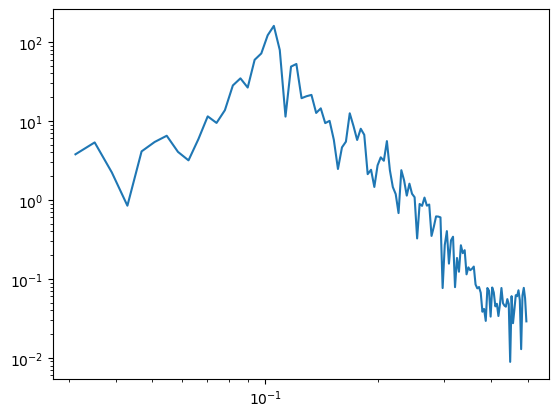

In [258]:
fig, ax = plt.subplots()
y = drifter_df.loc[maxwaveheightbool]['energy_density'].squeeze()
x = drifter_df.loc[maxwaveheightbool]['frequency'].squeeze()
ax.plot(x, y)
ax.set_xscale('log')
ax.set_yscale('log')

drifter_df.loc[maxwaveheightbool]['peak_period'].squeeze() **(-1)  # Hz
drifter_df.loc[maxwaveheightbool]['mean_period'].squeeze() **(-1)  # Hz
var = np.trapz(y, x, axis = -1)
sigwaveheight = 4*(np.sqrt(var))
print(sigwaveheight)

In [259]:
drifter_df.loc['SPOT-30164D']

latitude  longitude  significant_height  \
time                                                                 
2023-08-28 22:17:31+00:00  28.87520  -84.34910               0.530   
2023-08-28 23:17:31+00:00  28.88597  -84.36055               0.484   
2023-08-29 00:17:31+00:00  28.89878  -84.36770               0.432   
2023-08-29 01:17:31+00:00  28.91407  -84.37098               0.449   
2023-08-29 02:17:31+00:00  28.93022  -84.37178               0.449   
...                             ...        ...                 ...   
2023-08-31 18:17:31+00:00  29.00087  -85.25447               0.945   
2023-08-31 20:18:24+00:00  29.01693  -85.28587               0.863   
2023-08-31 21:18:24+00:00  29.02577  -85.30423               0.847   
2023-08-31 22:18:24+00:00  29.03567  -85.32205               0.789   
2023-08-31 23:18:24+00:00  29.04548  -85.33762               0.832   

                           peak_period  peak_direction  \
time                                                     
2023-08-28 22:17:31+00:00        4.096         124.365   
2023-08-28 23:17:31+00:00        3.938         121.722   
2023-08-29 00:17:31+00:00        4.096         121.985   
2023-08-29 01:17:31+00:00        3.938         125.458   
2023-08-29 02:17:31+00:00        3.938         126.432   
...                                ...             ...   
2023-08-31 18:17:31+00:00        7.314         168.399   
2023-08-31 20:18:24+00:00        7.314         169.856   
2023-08-31 21:18:24+00:00        7.314         172.286   
2023-08-31 22:18:24+00:00        7.314         170.548   
2023-08-31 23:18:24+00:00        7.314         170.548   

                           peak_directional_spread  mean_period  \
time                                                              
2023-08-28 22:17:31+00:00                22.729826     3.353445   
2023-08-28 23:17:31+00:00                25.646812     3.264370   
2023-08-29 00:17:31+00:00                29.715524     3.130826   
2023-08-29 01:17:31+00:00                26.073086     3.043518   
2023-08-29 02:17:31+00:00                26.202213     2.988434   
...                                            ...          ...   
2023-08-31 18:17:31+00:00                19.342130     5.920365   
2023-08-31 20:18:24+00:00                21.057402     5.607473   
2023-08-31 21:18:24+00:00                21.100202     5.520342   
2023-08-31 22:18:24+00:00                22.543618     5.338056   
2023-08-31 23:18:24+00:00                20.739607     5.216048   

                           mean_direction  mean_directional_spread  \
time                                                                 
2023-08-28 22:17:31+00:00      123.703761                39.622769   
2023-08-28 23:17:31+00:00      124.557940                40.210313   
2023-08-29 00:17:31+00:00      125.547444                43.967229   
2023-08-29 01:17:31+00:00      130.434860                42.434815   
2023-08-29 02:17:31+00:00      133.951830                42.842480   
...                                   ...                      ...   
2023-08-31 18:17:31+00:00      171.422326                36.882235   
2023-08-31 20:18:24+00:00      173.817932                40.283795   
2023-08-31 21:18:24+00:00      175.886057                38.942834   
2023-08-31 22:18:24+00:00      176.289927                40.142634   
2023-08-31 23:18:24+00:00      176.046283                37.160988   

                                                                   frequency  \
time                                                                           
2023-08-28 22:17:31+00:00  [0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...   
2023-08-28 23:17:31+00:00  [0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...   
2023-08-29 00:17:31+00:00  [0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...   
2023-08-29 01:17:31+00:00  [0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...   
2023-08-29 02:17:31+00:00  [0.0293, 0.03906, 0.04883, 0.05859, 0.06836, 0...   
...               

In [260]:
drifter_df.iloc[0]

latitude                                                            27.624407
longitude                                                          -82.959137
significant_height                                                   0.466788
peak_period                                                          3.779297
peak_direction                                                      164.43849
peak_directional_spread                                             34.371645
mean_period                                                          5.060513
mean_direction                                                     169.504317
mean_directional_spread                                             65.246481
frequency                   [0.009765625, 0.021484375, 0.033203125, 0.0449...
energy_density              [0.21016438802083334, 0.14790852864583334, 0.0...
a1                          [-0.23, 0.11, -0.19, -0.11, 0.14, -0.1, 0.01, ...
b1                          [-0.01, 0.18, -0.04, 0.04, 0.16, 0.1

C:\Users\Emily\AppData\Local\Temp\ipykernel_1492\595549299.py:20: UserWarning: registration of accessor <class '__main__.BuoyDataFrameAccessor'> under name 'buoy' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("buoy")


Reconstructing 2d spectrum with mem2 using solution_method scipy:   0%|                                       …

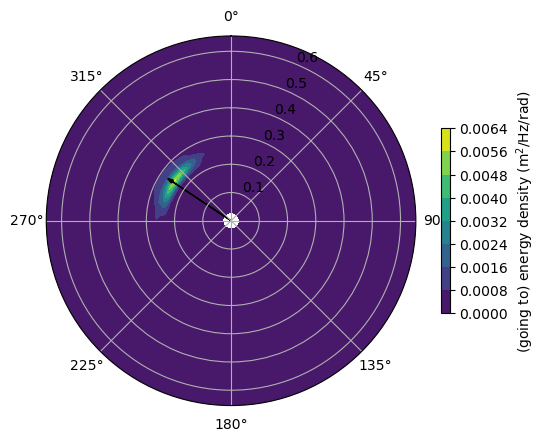

In [261]:
#energy component direction

from roguewavespectrum import Spectrum

import types
from typing import Callable, List, Tuple, Optional

import numpy as np
import pandas as pd
import xarray as xr
from pandas.api.typing import DataFrameGroupBy

# from littlebuoybigwaves import waves, buoy, utilities

var_namespace = types.SimpleNamespace(
    frequency='frequency',
    time='time'
)

@pd.api.extensions.register_dataframe_accessor("buoy")
class BuoyDataFrameAccessor:
    def __init__(self, pandas_obj):
        # self._validate(pandas_obj)  #TODO:
        self._obj = pandas_obj
        self._vars = var_namespace

    @property
    def vars(self) -> types.SimpleNamespace:
        """ Return a SimpleNamespace with this DataFrame's variable names. """
        return self._vars

    @property
    def spectral_variables(self) -> List:
        """ Return a list of spectral variables in the DataFrame. """
        return self._get_spectral_variables()[0]

    def _get_element_sizes(self) -> pd.DataFrame:
        """ Return a DataFrame of sizes for each element in the DataFrame. """
        # Apply np.size element-wise to generate a DataFrame of sizes
        return self._obj.map(np.size, na_action='ignore')

    def _get_spectral_variables(
        self,
        frequency_col: Optional[str] = None
    ) -> Tuple[List, pd.DataFrame]:
        """ Return a spectral variable names list and DataFrame of sizes. """
        if frequency_col is None:
            frequency_col = self.vars.frequency

        # Compare each column in size_df to the frequency column and return
        # only the matching columns, which should be spectral.
        size_df = self._get_element_sizes()
        try:
            is_spectral = size_df.apply(
                lambda col: size_df[frequency_col].equals(col)
            )
            spectral_variable_names = is_spectral.index[is_spectral].to_list()
            spectral_variable_sizes = size_df.loc[:, spectral_variable_names]
        except KeyError:
            spectral_variable_names = []
            spectral_variable_sizes = pd.DataFrame()
        return spectral_variable_names, spectral_variable_sizes

    def to_xarray(
        self,
        frequency_col: Optional[str] = None,
        time_col: Optional[str] = None,
    ) -> xr.Dataset:
        """ Return this DataFrame as an Xarray Dataset. """
        if frequency_col is None:
            frequency_col = self.vars.frequency
        if time_col is None:
            time_col = self.vars.time

        # Bulk (single value) and spectral columns must be handled separately
        # since `.to_xarray()` does not convert elements containing arrays.
        spectral_variables = self._get_spectral_variables(frequency_col)[0]
        drifter_bulk_ds = (self._obj
                           .drop(columns=spectral_variables)
                           .to_xarray())

        drifter_spectral_ds = (self._obj
                               .loc[:, spectral_variables]
                               .explode(spectral_variables)
                               .set_index(frequency_col, append=True)
                               .to_xarray())

        drifter_ds = xr.merge([drifter_bulk_ds, drifter_spectral_ds])
        drifter_ds[time_col] = pd.DatetimeIndex(drifter_ds[time_col].values)
        return drifter_ds


def spectra_2d_from_df(drifter_df):
    dataset_variables = [
        'energy_density',
        'frequency',
        'a1', 'b1', 'a2', 'b2',
        'mean_direction',
    ]
    variable_name_mapping = {
        'energy_density': 'variance_density',
        'frequency': 'frequency',
    }

    # Convert the DataFrame to an xarray dataset
    drifter_ds = (drifter_df
                  .loc[:, dataset_variables]
                  .buoy.to_xarray(frequency_col='frequency')
                  .astype(float))

    # Create a Spectrum object and compute the directional spectrum.
    drfiter_spectra_1d = Spectrum.from_dataset(drifter_ds, mapping=variable_name_mapping)
    drifter_spectra_2d = drfiter_spectra_1d.as_frequency_direction_spectrum(
        number_of_directions=720,
        method="mem2",
        solution_method="scipy"
    )
    return drifter_spectra_2d


def plot_2d_spectrum(ax, energy_density, frequency, direction, **kwargs):
    im = ax.contourf(
        direction,
        frequency,
        energy_density,
        **kwargs
    )
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.grid('on')

    return im


def plot_2d_energy_density(
    ax,
    drifter_spectra_2d,
    plot_colorbar=True,
    **spectrum_kwargs,
):
    # spectrum_kwargs = dict(
    #     cmap=colorcet.cm.CET_L17,
    #     norm=mpl.colors.LogNorm(vmin=10**(-6), vmax=10**(0)),
    #     levels=np.geomspace(10**(-6), 10**(0), num=7),
    # )
    energy_density = drifter_spectra_2d.directional_variance_density.squeeze()
    frequency = drifter_spectra_2d.frequency.values.squeeze()
    direction = np.deg2rad(drifter_spectra_2d.direction(directional_convention='oceanographical')).values.squeeze()
    wave_direction_rad_to = (-180 + drifter_spectra_2d.dataset['mean_direction'].values.squeeze()) * np.pi/180

    im = plot_2d_spectrum(
        ax,
        energy_density=energy_density,
        frequency=frequency,
        direction=direction,
        **spectrum_kwargs
    )
    ax.tick_params(axis='y', which='major', pad=1)

    if plot_colorbar:
        cbar=plt.colorbar(im, shrink=0.5)
        cbar.set_label('(going to) energy density (m$^2$/Hz/rad)')
    ax.arrow(wave_direction_rad_to, 0, 0, 0.25, head_width=0.05, head_length=0.02, fc='k', ec='k')


drifter_spectra_2d = spectra_2d_from_df(drifter_df.loc['SPOT-30164D'])
# spotter_spectra_2d.dataset['directional_slope_spectrum'] = calculate_slope_spectra(
#     spotter_spectra_2d
# )
# microswift_spectra_2d.dataset['directional_slope_spectrum'] = calculate_slope_spectra(
#     microswift_spectra_2d
# )


fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
plot_2d_energy_density(ax, drifter_spectra_2d.isel(time=0))



In [262]:
import numpy as np
print(np.__version__)

1.26.4


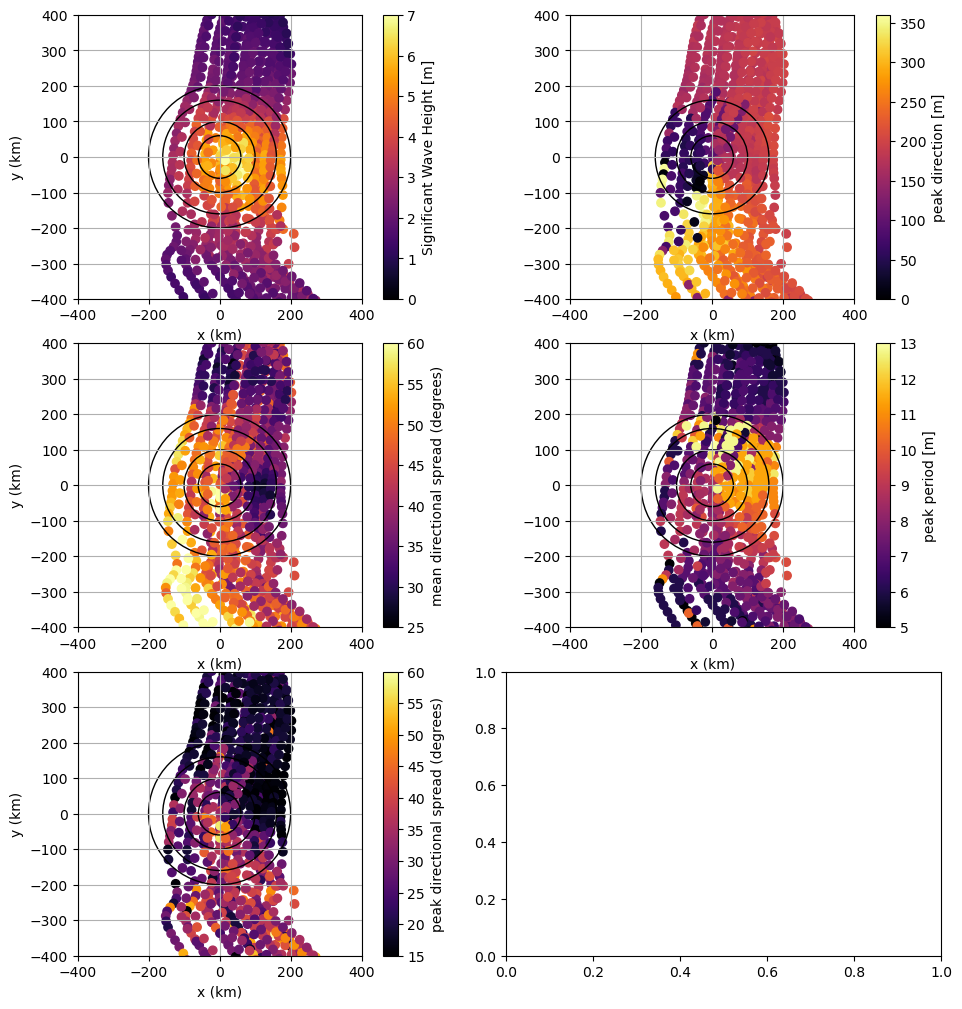

In [263]:
cmap = 'inferno'
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
fig.tight_layout()


# first plot
x = xstorm
y = ystorm
c=drifter_df.significant_height
norm = plt.Normalize(0,7)
sc = ax[0,0].scatter(x,y,c=c, cmap=cmap, norm=norm)
ax[0,0].set_xlabel('x (km)')
ax[0,0].set_ylabel('y (km)')
ax[0,0].grid()
ax[0,0].set_xlim([-400, 400])
ax[0,0].set_ylim([-400, 400])
cc = mpl.patches.Circle(( 0,0), 60, fill=False)
ax[0,0].set_aspect( 1 ) 
ax[0,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 100, fill=False)
ax[0,0].set_aspect( 1 ) 
ax[0,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 160, fill=False)
ax[0,0].set_aspect( 1 ) 
ax[0,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 200, fill=False)
ax[0,0].set_aspect( 1 ) 
ax[0,0].add_patch( cc ) 
fig.colorbar(sc, ax=ax[0,0], label='Significant Wave Height [m]')

#graph2
cmap = 'inferno'
plt.grid()
x = xstorm
y = ystorm
c=c = (drifter_df['peak_direction']-drifter_df['storm_direction'])%360
norm = mpl.colors.Normalize(vmin=0, vmax=360)
sc = ax[0,1].scatter(x,y,c=c, cmap=cmap, norm=norm)
ax[0,1].set_xlabel('x (km)')
ax[0,1].grid()
ax[0,1].set_xlim([-400, 400])
ax[0,1].set_ylim([-400, 400])

cc = mpl.patches.Circle(( 0,0), 60, fill=False)
ax[0,1].set_aspect( 1 ) 
ax[0,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 100, fill=False)
ax[0,1].set_aspect( 1 ) 
ax[0,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 160, fill=False)
ax[0,1].set_aspect( 1 ) 
ax[0,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 200, fill=False)
ax[0,1].set_aspect( 1 ) 

ax2.set_xlabel('peak direction', fontsize=9, labelpad=2)

fig.colorbar(sc, ax=ax[0,1], label='peak direction [m]')






plt.grid()



#peak period, how fast waves go up and down
cmap = 'inferno'
x = xstorm
y = ystorm
c=drifter_df.peak_period
norm = plt.Normalize(5,13)
sc = ax[1,1].scatter(x,y,c=c, cmap=cmap, norm=norm)
ax[1,1].set_xlabel('x (km)')
ax[1,1].grid()
ax[1,1].set_xlim([-400, 400])
ax[1,1].set_ylim([-400, 400])
cc = mpl.patches.Circle(( 0,0), 60, fill=False)
ax[1,1].set_aspect( 1 ) 
ax[1,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 100, fill=False)
ax[1,1].set_aspect( 1 ) 
ax[1,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 160, fill=False)
ax[1,1].set_aspect( 1 ) 
ax[1,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 200, fill=False)
ax[1,1].set_aspect( 1 ) 
ax[1,1].add_patch( cc ) 
fig.colorbar(sc, ax=ax[1,1], label='peak period [m]')



#mean directional spread
cmap = 'inferno'
x = xstorm
y = ystorm
c=drifter_df.mean_directional_spread
norm = plt.Normalize(25,60)
sc = ax[1,0].scatter(x,y,c=c, cmap=cmap, norm=norm)
ax[1,0].set_xlabel('x (km)')
ax[1,0].set_ylabel('y (km)')
ax[1,0].grid()
ax[1,0].set_xlim([-400, 400])
ax[1,0].set_ylim([-400, 400])
cc = mpl.patches.Circle(( 0,0), 60, fill=False)
ax[1,0].set_aspect( 1 ) 
ax[1,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 100, fill=False)
ax[1,0].set_aspect( 1 ) 
ax[1,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 160, fill=False)
ax[1,0].set_aspect( 1 ) 
ax[1,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 200, fill=False)
ax[1,0].set_aspect( 1 ) 
ax[1,0].add_patch( cc ) 
fig.colorbar(sc, ax=ax[1,0], label='mean directional spread (degrees)')
#peak spread
x = xstorm
y = ystorm
c=drifter_df.peak_directional_spread
norm = plt.Normalize(15,60)
sc = ax[2,0].scatter(x,y,c=c, cmap=cmap, norm=norm)
ax[2,0].set_xlabel('x (km)')
ax[2,0].set_ylabel('y (km)')
ax[2,0].grid()
ax[2,0].set_xlim([-400, 400])
ax[2,0].set_ylim([-400, 400])
cc = mpl.patches.Circle(( 0,0), 60, fill=False)
ax[2,0].set_aspect( 1 ) 
ax[2,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 100, fill=False)
ax[2,0].set_aspect( 1 ) 
ax[2,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 160, fill=False)
ax[2,0].set_aspect( 1 ) 
ax[2,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 200, fill=False)
ax[2,0].set_aspect( 1 ) 
ax[2,0].add_patch( cc ) 
fig.colorbar(sc, ax=ax[2,0], label='peak directional spread (degrees)')

plt.show()


In [264]:
ibtracs_df.BOM_EYE

ISO_TIME
2023-08-26 12:00:00+00:00     
2023-08-26 15:00:00+00:00     
2023-08-26 18:00:00+00:00     
2023-08-26 21:00:00+00:00     
2023-08-27 00:00:00+00:00     
                            ..
2023-09-07 18:00:00+00:00     
2023-09-07 21:00:00+00:00     
2023-09-08 00:00:00+00:00     
2023-09-08 03:00:00+00:00     
2023-09-08 06:00:00+00:00     
Name: BOM_EYE, Length: 104, dtype: object

In [265]:
ibtracs_df.USA_RMW

start_date = pd.Timestamp('2023-08-30T00:00', tz='utc')
end_date = pd.Timestamp('2023-08-30T15:00', tz='utc')
time_slice = slice(start_date, end_date)
time_slice_no_tz = slice(start_date.tz_localize(None), end_date.tz_localize(None))
rmwkm = ibtracs_df.loc[time_slice].USA_RMW.apply(float).mean()*1.852

In [266]:
rmwkm = ibtracs_df.loc[time_slice].USA_RMW.apply(float).mean()*1.852

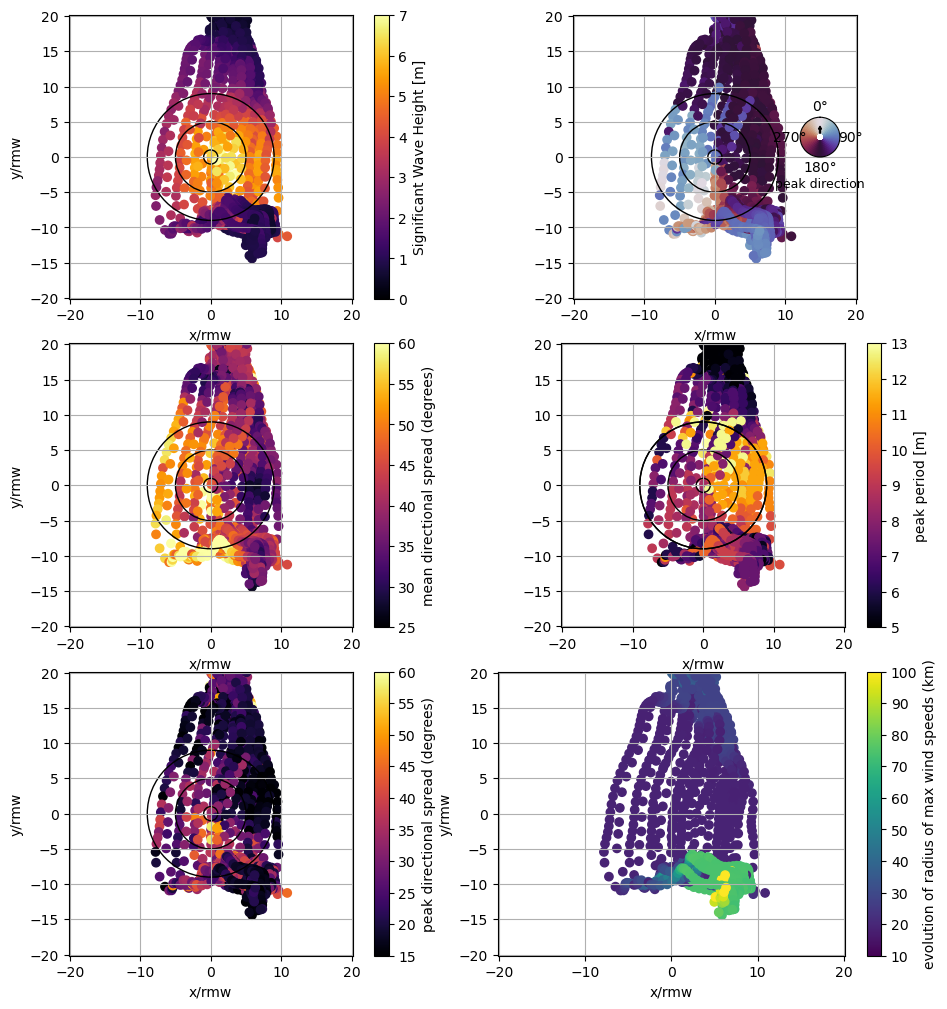

In [267]:
#rmw being constant radius

cmap = 'inferno'
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
fig.tight_layout()


start_date = pd.Timestamp('2023-08-30T00:00', tz='utc')
end_date = pd.Timestamp('2023-08-30T15:00', tz='utc')
time_slice = slice(start_date, end_date)
time_slice_no_tz = slice(start_date.tz_localize(None), end_date.tz_localize(None))
rmwkm = ibtracs_df.loc[time_slice].USA_RMW.apply(float).mean()*1.852

# first plot
x = drifter_df.xstorm/drifter_df.stormrmwkm
y = drifter_df.ystorm/drifter_df.stormrmwkm

c=drifter_df.significant_height
norm = plt.Normalize(0,7)
sc = ax[0,0].scatter(x,y,c=c, cmap=cmap, norm=norm)
ax[0,0].set_xlabel('x/rmw')
ax[0,0].set_ylabel('y/rmw')
ax[0,0].grid()
ax[0,0].set_xlim(np.array([-400, 400]) / rmwkm)
ax[0,0].set_ylim(np.array([-400, 400]) / rmwkm)
cc = mpl.patches.Circle(( 0,0),1, fill=False)
ax[0,0].set_aspect( 1 ) 
ax[0,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0),5, fill=False)
ax[0,0].set_aspect( 1 ) 
ax[0,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 9, fill=False)
ax[0,0].set_aspect( 1 ) 
ax[0,0].add_patch( cc ) 
fig.colorbar(sc, ax=ax[0,0], label='Significant Wave Height [m]')

#graph2
cmap = 'twilight'
plt.grid()
x = drifter_df.xstorm/drifter_df.stormrmwkm
y = drifter_df.ystorm/drifter_df.stormrmwkm
c=c = (drifter_df['peak_direction']-drifter_df['storm_direction'])%360
norm = mpl.colors.Normalize(vmin=0, vmax=360)
sc = ax[0,1].scatter(x,y,c=c, cmap=cmap, norm=norm)
ax[0,1].set_xlabel('x/rmw')
ax[0,1].grid()
circle=plt.Circle((0,0),100)
ax[0,1].set_xlim(np.array([-400, 400]) / rmwkm)
ax[0,1].set_ylim(np.array([-400, 400]) / rmwkm)

cc = mpl.patches.Circle(( 0,0), 1, fill=False)
ax[0,1].set_aspect( 1 ) 
ax[0,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 5, fill=False)
ax[0,1].set_aspect( 1 ) 
ax[0,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 9, fill=False)
ax[0,1].set_aspect( 1 ) 
ax[0,1].add_patch( cc ) 


legend_location = [.8,0.5,.14,.14]  # x, y, width, height
ax2 = ax[0,1].inset_axes(legend_location, projection='polar')
azimuths = np.arange(0, 361, 1)
zeniths = np.linspace(0.2, 1, 10)
values = azimuths * np.ones((len(zeniths), len(azimuths)))
ax2.pcolormesh(azimuths*np.pi/180.0, zeniths, values, cmap=cmap, norm=norm)
ax2.set_yticks([])
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
ax2.xaxis.grid(False)
ax2.tick_params(pad=-3,labelsize=10)
ax2.set_ylim([0, 1])
ax2.set_xticks([0, np.pi/2, np.pi])
ax2.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])

ax3 = ax[0,1].inset_axes(legend_location)
ax2.set_xlabel('peak direction', fontsize=9, labelpad=2)



arrow_kwargs = dict(  #TODO: used for RMW norm
    dx=0,
    dy=0.2,
    width=0.05,
    color='k',
    lw=1,
    head_length=0.15,
)
ax3.arrow(0, 0.2, **arrow_kwargs)
ax3.set_axis_off()
ax3.set_ylim([-1, 1])
ax3.set_xlim([-1, 1])



plt.grid()



#peak period, how fast waves go up and down
cmap = 'inferno'

x = drifter_df.xstorm/drifter_df.stormrmwkm
y = drifter_df.ystorm/drifter_df.stormrmwkm

c=drifter_df.peak_period
norm = plt.Normalize(5,13)
sc = ax[1,1].scatter(x,y,c=c, cmap=cmap, norm=norm)
ax[1,1].set_xlabel('x/rmw')
ax[1,1].grid()
ax[1,1].set_xlim(np.array([-400, 400]) / rmwkm)
ax[1,1].set_ylim(np.array([-400, 400]) / rmwkm)
cc = mpl.patches.Circle(( 0,0), 1, fill=False)
ax[1,1].set_aspect( 1 ) 
ax[1,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 5, fill=False)
ax[1,1].set_aspect( 1 ) 
ax[1,1].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 9, fill=False)
ax[1,1].set_aspect( 1 ) 
ax[1,1].add_patch( cc ) 

ax[1,1].set_aspect( 1 ) 
ax[1,1].add_patch( cc ) 
fig.colorbar(sc, ax=ax[1,1], label='peak period [m]')



#mean directional spread
cmap = 'inferno'
x = drifter_df.xstorm/drifter_df.stormrmwkm
y = drifter_df.ystorm/drifter_df.stormrmwkm
c=drifter_df.mean_directional_spread
norm = plt.Normalize(25,60)
sc = ax[1,0].scatter(x,y,c=c, cmap=cmap, norm=norm)
ax[1,0].set_xlabel('x/rmw')
ax[1,0].set_ylabel('y/rmw')
ax[1,0].grid()
ax[1,0].set_xlim(np.array([-400, 400]) / rmwkm)
ax[1,0].set_ylim(np.array([-400, 400]) / rmwkm)
cc = mpl.patches.Circle(( 0,0), 1, fill=False)
ax[1,0].set_aspect( 1 ) 
ax[1,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 5, fill=False)
ax[1,0].set_aspect( 1 ) 
ax[1,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 9, fill=False)
ax[1,0].set_aspect( 1 ) 
ax[1,0].add_patch( cc ) 
 
fig.colorbar(sc, ax=ax[1,0], label='mean directional spread (degrees)')
#peak spread
x = drifter_df.xstorm/drifter_df.stormrmwkm
y = drifter_df.ystorm/drifter_df.stormrmwkm
c=drifter_df.peak_directional_spread
norm = plt.Normalize(15,60)
sc = ax[2,0].scatter(x,y,c=c, cmap=cmap, norm=norm)
ax[2,0].set_xlabel('x/rmw')
ax[2,0].set_ylabel('y/rmw')
ax[2,0].grid()
ax[2,0].set_xlim(np.array([-400, 400]) / rmwkm)
ax[2,0].set_ylim(np.array([-400, 400]) / rmwkm)
cc = mpl.patches.Circle(( 0,0), 1, fill=False)
ax[2,0].set_aspect( 1 ) 
ax[2,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 5, fill=False)
ax[2,0].set_aspect( 1 ) 
ax[2,0].add_patch( cc ) 

cc = mpl.patches.Circle(( 0,0), 9, fill=False)
ax[2,0].set_aspect( 1 ) 
ax[2,0].add_patch( cc ) 

fig.colorbar(sc, ax=ax[2,0], label='peak directional spread (degrees)')

#radius of max winds evolution

cmap = "viridis"

x = drifter_df.xstorm/drifter_df.stormrmwkm
y = drifter_df.ystorm/drifter_df.stormrmwkm
c=drifter_df.stormrmwkm
norm = plt.Normalize(10,100)
sc = ax[2,1].scatter(x,y,c=c, cmap=cmap, norm=norm)
ax[2,1].set_xlabel('x/rmw')
ax[2,1].set_ylabel('y/rmw')
ax[2,1].grid()
ax[2,1].set_xlim(np.array([-400, 400]) / rmwkm)
ax[2,1].set_ylim(np.array([-400, 400]) / rmwkm)

fig.colorbar(sc, ax=ax[2,1], label='evolution of radius of max wind speeds (km)')


plt.show()



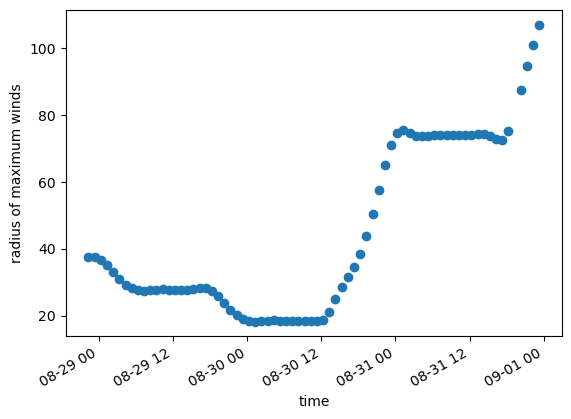

In [268]:
x = drifter_df.loc[drifter].index
y =drifter_df.loc[drifter].stormrmwkm

fig, ax = plt.subplots()
sc = ax.scatter(x,y)
ax.set_xlabel('time')
ax.set_ylabel('radius of maximum winds')
fig.autofmt_xdate()


plt.show()


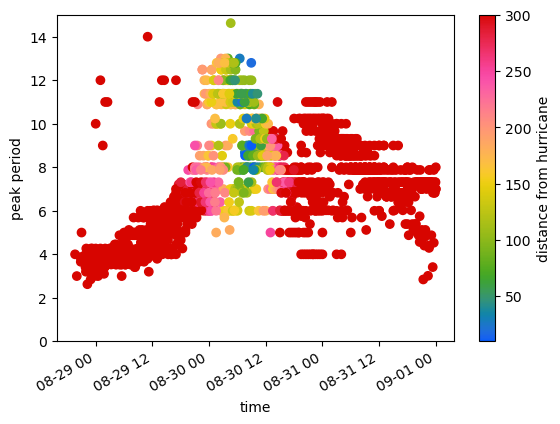

In [269]:
fig, ax = plt.subplots()
cmap = "cet_diverging_rainbow_bgymr_45_85_c67"
norm = plt.Normalize(10, 300)
for drifter in drifterids:

    x = drifter_df.loc[drifter].index
    y = drifter_df.loc[drifter].peak_period
    c = drifter_df.loc[drifter].storm_distance
    sc = ax.scatter(x,y,c=c,norm=norm, cmap=cmap)


 # min, max

ax.set_xlabel('time')
ax.set_ylabel('peak period')
ax.set_ylim([0, 15])
fig.autofmt_xdate()

fig.colorbar(sc, ax=ax, label='distance from hurricane')

plt.show()

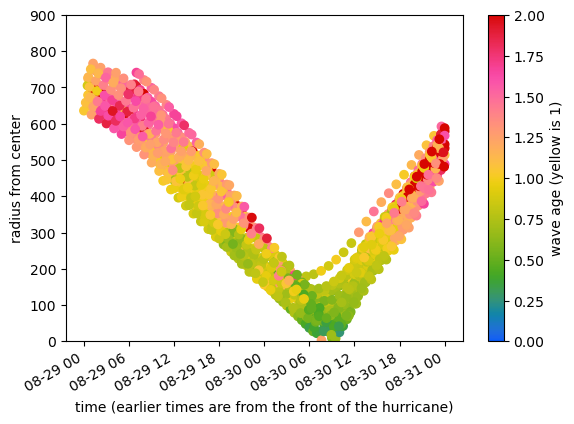

In [270]:
fig, ax = plt.subplots()
cmap = "cet_diverging_rainbow_bgymr_45_85_c67"
norm = plt.Normalize(0,2)
for drifter in drifterids:

    x = drifter_df.loc[drifter].index
    y = drifter_df.loc[drifter].storm_distance
    c = drifter_df.loc[drifter].peak_wave_age
    sc = ax.scatter(x,y,c=c,norm=norm, cmap=cmap)


 # min, max


ax.set_xlabel('time (earlier times are from the front of the hurricane)')
ax.set_ylabel('radius from center')
ax.set_ylim([0, 900])
fig.autofmt_xdate()

fig.colorbar(sc, ax=ax, label='wave age (yellow is 1)')

plt.show()

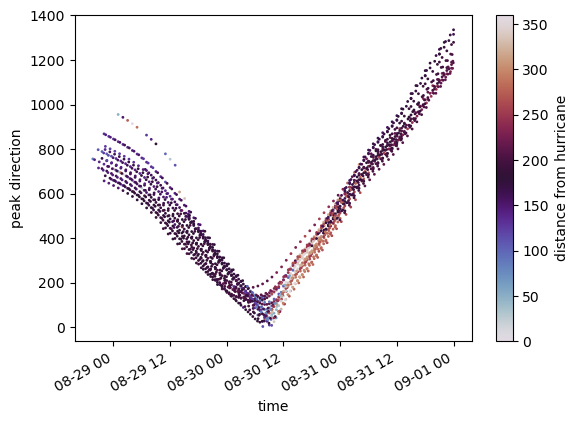

In [271]:
fig, ax = plt.subplots()
cmap = "twilight"
norm = plt.Normalize(0, 360)
for drifter in drifterids:

    x = drifter_df.loc[drifter].index
    y = drifter_df.loc[drifter].storm_distance
    c = drifter_df.loc[drifter].peak_direction
    sc = ax.scatter(x,y,c=c,norm=norm, cmap=cmap, s=1)


 # min, max

ax.set_xlabel('time')
ax.set_ylabel('peak direction')
fig.autofmt_xdate()

fig.colorbar(sc, ax=ax, label='distance from hurricane')

plt.show()

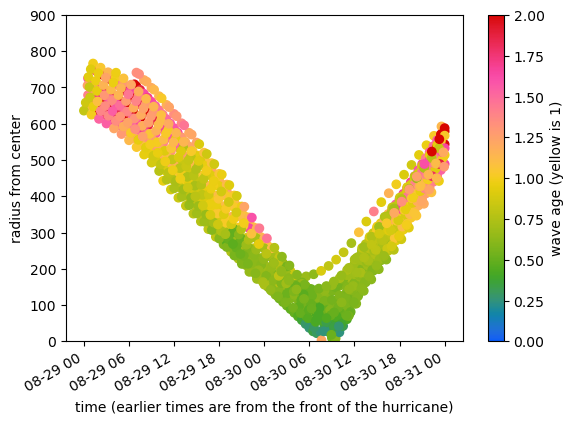

In [272]:
fig, ax = plt.subplots()
cmap = "cet_diverging_rainbow_bgymr_45_85_c67"
norm = plt.Normalize(0,2)
for drifter in drifterids:

    x = drifter_df.loc[drifter].index
    y = drifter_df.loc[drifter].storm_distance
    c = drifter_df.loc[drifter].mean_wave_age
    sc = ax.scatter(x,y,c=c,norm=norm, cmap=cmap)


 # min, max


ax.set_xlabel('time (earlier times are from the front of the hurricane)')
ax.set_ylabel('radius from center')
ax.set_ylim([0, 900])
fig.autofmt_xdate()

fig.colorbar(sc, ax=ax, label='wave age (yellow is 1)')

plt.show()

In [282]:
import xarray as xr
from pandas.api.typing import DataFrameGroupBy

cmap = "cool"

# from littlebuoybigwaves import waves, buoy, utilities

var_namespace = types.SimpleNamespace(
    frequency='frequency',
    time='time'
)

@pd.api.extensions.register_dataframe_accessor("buoy")
class BuoyDataFrameAccessor:
    def __init__(self, pandas_obj):
        # self._validate(pandas_obj)  #TODO:
        self._obj = pandas_obj
        self._vars = var_namespace

    @property
    def vars(self) -> types.SimpleNamespace:
        """ Return a SimpleNamespace with this DataFrame's variable names. """
        return self._vars

    @property
    def spectral_variables(self) -> List:
        """ Return a list of spectral variables in the DataFrame. """
        return self._get_spectral_variables()[0]

    def _get_element_sizes(self) -> pd.DataFrame:
        """ Return a DataFrame of sizes for each element in the DataFrame. """
        # Apply np.size element-wise to generate a DataFrame of sizes
        return self._obj.map(np.size, na_action='ignore')

    def _get_spectral_variables(
        self,
        frequency_col: Optional[str] = None
    ) -> Tuple[List, pd.DataFrame]:
        """ Return a spectral variable names list and DataFrame of sizes. """
        if frequency_col is None:
            frequency_col = self.vars.frequency

        # Compare each column in size_df to the frequency column and return
        # only the matching columns, which should be spectral.
        size_df = self._get_element_sizes()
        try:
            is_spectral = size_df.apply(
                lambda col: size_df[frequency_col].equals(col)
            )
            spectral_variable_names = is_spectral.index[is_spectral].to_list()
            spectral_variable_sizes = size_df.loc[:, spectral_variable_names]
        except KeyError:
            spectral_variable_names = []
            spectral_variable_sizes = pd.DataFrame()
        return spectral_variable_names, spectral_variable_sizes

    def to_xarray(
        self,
        frequency_col: Optional[str] = None,
        time_col: Optional[str] = None,
    ) -> xr.Dataset:
        """ Return this DataFrame as an Xarray Dataset. """
        if frequency_col is None:
            frequency_col = self.vars.frequency
        if time_col is None:
            time_col = self.vars.time

        # Bulk (single value) and spectral columns must be handled separately
        # since `.to_xarray()` does not convert elements containing arrays.
        spectral_variables = self._get_spectral_variables(frequency_col)[0]
        drifter_bulk_ds = (self._obj
                           .drop(columns=spectral_variables)
                           .to_xarray())

        drifter_spectral_ds = (self._obj
                               .loc[:, spectral_variables]
                               .explode(spectral_variables)
                               .set_index(frequency_col, append=True)
                               .to_xarray())

        drifter_ds = xr.merge([drifter_bulk_ds, drifter_spectral_ds])
        drifter_ds[time_col] = pd.DatetimeIndex(drifter_ds[time_col].values)
        return drifter_ds


def spectra_2d_from_df(drifter_df):
    dataset_variables = [
        'energy_density',
        'frequency',
        'a1', 'b1', 'a2', 'b2',
        'mean_direction',
        'peak_direction',
        'storm_direction',
    ]
    variable_name_mapping = {
        'energy_density': 'variance_density',
        'frequency': 'frequency',
    }

    # Convert the DataFrame to an xarray dataset
    drifter_ds = (drifter_df
                  .loc[:, dataset_variables]
                  .buoy.to_xarray(frequency_col='frequency')
                  .astype(float))

    # Create a Spectrum object and compute the directional spectrum.
    drfiter_spectra_1d = Spectrum.from_dataset(drifter_ds, mapping=variable_name_mapping)
    drifter_spectra_2d = drfiter_spectra_1d.as_frequency_direction_spectrum(
        number_of_directions=720,
        method="mem2",
        solution_method="scipy"
    )
    return drifter_spectra_2d


def plot_2d_spectrum(ax, energy_density, frequency, direction, **kwargs):
    im = ax.contourf(
        direction,
        frequency,
        energy_density,
        **kwargs
    )
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.grid('on')

    return im


def plot_2d_energy_density(
    ax,
    drifter_spectra_2d,
    plot_colorbar=True,
    **spectrum_kwargs,
):
    # spectrum_kwargs = dict(
    #     cmap=colorcet.cm.CET_L17,
    #     norm=mpl.colors.LogNorm(vmin=10**(-6), vmax=10**(0)),
    #     levels=np.geomspace(10**(-6), 10**(0), num=7),
    # )
    energy_density = drifter_spectra_2d.directional_variance_density.squeeze()
    frequency = drifter_spectra_2d.frequency.values.squeeze()
    direction = np.deg2rad(drifter_spectra_2d.direction(directional_convention='oceanographical')).values.squeeze()
    storm_direction_rad_to = (-180 + drifter_spectra_2d.dataset['storm_direction'].values.squeeze()) * np.pi/180
    mean_wave_direction_rad_to = (-180 + drifter_spectra_2d.dataset['mean_direction'].values.squeeze()) * np.pi/180
    peak_wave_direction_rad_to = (-180 + drifter_spectra_2d.dataset['peak_direction'].values.squeeze()) * np.pi/180

    im = plot_2d_spectrum(
        ax,
        energy_density=energy_density,
        frequency=frequency,
        direction=direction,
        **spectrum_kwargs
    )
    ax.tick_params(axis='y', which='major', pad=1)

    if plot_colorbar:
        cbar=plt.colorbar(im, shrink=0.5)
        cbar.set_label('(going to) energy density (m$^2$/Hz/rad)')
    ax.arrow(storm_direction_rad_to, 0, 0, 0.25, head_width=0.05, head_length=0.02, fc='b', ec='b', label='storm direction')
    ax.arrow(mean_wave_direction_rad_to, 0, 0, 0.25, head_width=0.05, head_length=0.02, fc='k', ec='k', label='mean direction')
    ax.arrow(peak_wave_direction_rad_to, 0, 0, 0.25, head_width=0.05, head_length=0.02, fc='r', ec='r', label='peak direction')
    ax.legend()


C:\Users\Emily\AppData\Local\Temp\ipykernel_1492\251400385.py:13: UserWarning: registration of accessor <class '__main__.BuoyDataFrameAccessor'> under name 'buoy' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("buoy")


##SPOT-30164D



Reconstructing 2d spectrum with mem2 using solution_method scipy:   0%|                                       …

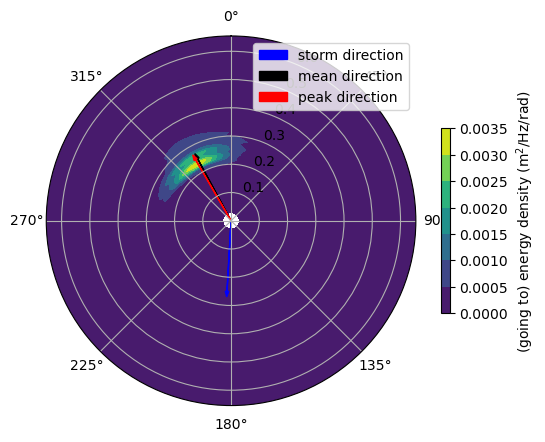

In [283]:


drifter_spectra_2d = spectra_2d_from_df(drifter_df.loc['SPOT-30164D'])#drifter id
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
plot_2d_energy_density(ax, drifter_spectra_2d.sel(time='2023-08-29-T12:00', method='nearest'))#time stamp '2023-08-30-T06:00'


Reconstructing 2d spectrum with mem2 using solution_method scipy:   0%|                                       …

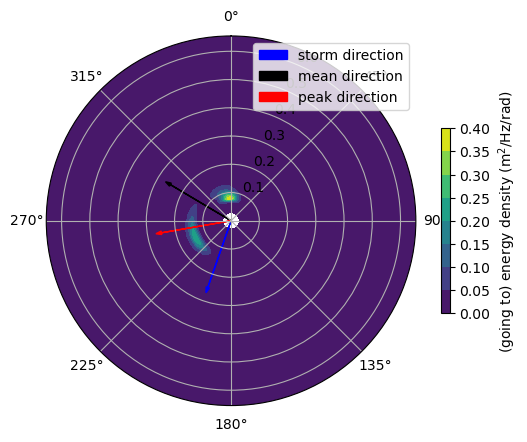

In [284]:
drifter_spectra_2d = spectra_2d_from_df(drifter_df.loc['SPOT-30164D'])#drifter id
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
plot_2d_energy_density(ax, drifter_spectra_2d.sel(time='2023-08-30-T06:00', method='nearest'))#time stamp '2023-08-30-T06:00'

Reconstructing 2d spectrum with mem2 using solution_method scipy:   0%|                                       …

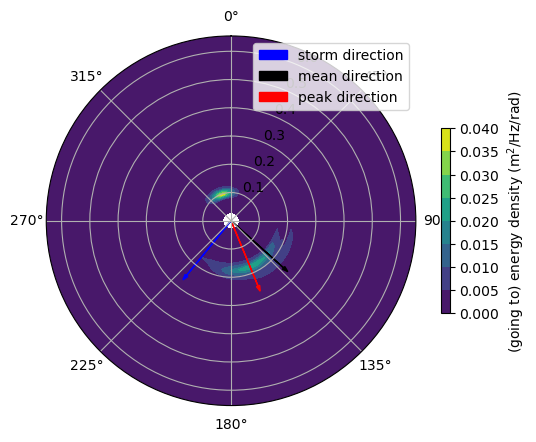

In [285]:
drifter_spectra_2d = spectra_2d_from_df(drifter_df.loc['SPOT-30164D'])#drifter id
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
plot_2d_energy_density(ax, drifter_spectra_2d.sel(time='2023-08-30-T18:00', method='nearest'))#time stamp '2023-08-30-T06:00'

## SPOT-30102D


Reconstructing 2d spectrum with mem2 using solution_method scipy:   0%|                                       …

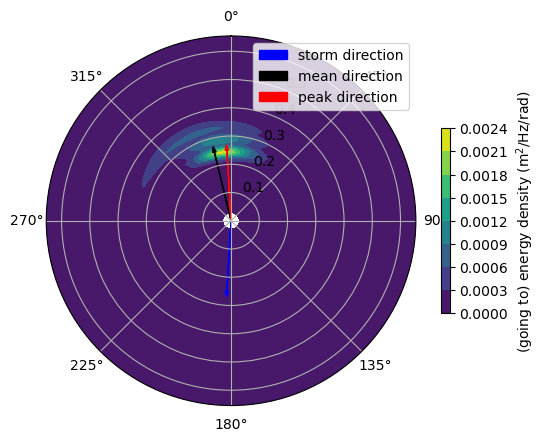

In [286]:

drifter_spectra_2d = spectra_2d_from_df(drifter_df.loc['SPOT-30102D'])#drifter id
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
plot_2d_energy_density(ax, drifter_spectra_2d.sel(time='2023-08-29-T012:00', method='nearest'))#time stamp '2023-08-30-T06:00'

Reconstructing 2d spectrum with mem2 using solution_method scipy:   0%|                                       …

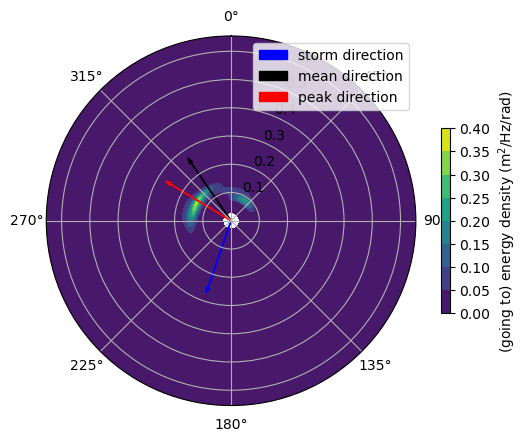

In [287]:
drifter_spectra_2d = spectra_2d_from_df(drifter_df.loc['SPOT-30102D'])#drifter id
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
plot_2d_energy_density(ax, drifter_spectra_2d.sel(time='2023-08-30-T06:00', method='nearest'))#time stamp '2023-08-30-T06:00'


Reconstructing 2d spectrum with mem2 using solution_method scipy:   0%|                                       …

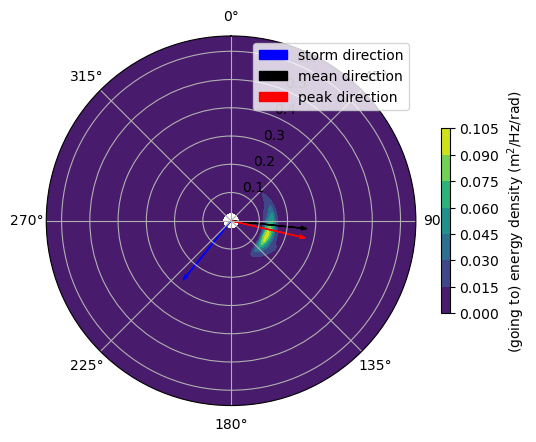

In [288]:
drifter_spectra_2d = spectra_2d_from_df(drifter_df.loc['SPOT-30102D'])#drifter id
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
plot_2d_energy_density(ax, drifter_spectra_2d.sel(time='2023-08-30-T18:00', method='nearest'))#time stamp '2023-08-30-T06:00'

In [289]:
import xarray as xr
from pandas.api.typing import DataFrameGroupBy

# from littlebuoybigwaves import waves, buoy, utilities

var_namespace = types.SimpleNamespace(
    frequency='frequency',
    time='time'
)

@pd.api.extensions.register_dataframe_accessor("buoy")
class BuoyDataFrameAccessor:
    def __init__(self, pandas_obj):
        # self._validate(pandas_obj)  #TODO:
        self._obj = pandas_obj
        self._vars = var_namespace

    @property
    def vars(self) -> types.SimpleNamespace:
        """ Return a SimpleNamespace with this DataFrame's variable names. """
        return self._vars

    @property
    def spectral_variables(self) -> List:
        """ Return a list of spectral variables in the DataFrame. """
        return self._get_spectral_variables()[0]

    def _get_element_sizes(self) -> pd.DataFrame:
        """ Return a DataFrame of sizes for each element in the DataFrame. """
        # Apply np.size element-wise to generate a DataFrame of sizes
        return self._obj.map(np.size, na_action='ignore')

    def _get_spectral_variables(
        self,
        frequency_col: Optional[str] = None
    ) -> Tuple[List, pd.DataFrame]:
        """ Return a spectral variable names list and DataFrame of sizes. """
        if frequency_col is None:
            frequency_col = self.vars.frequency

        # Compare each column in size_df to the frequency column and return
        # only the matching columns, which should be spectral.
        size_df = self._get_element_sizes()
        try:
            is_spectral = size_df.apply(
                lambda col: size_df[frequency_col].equals(col)
            )
            spectral_variable_names = is_spectral.index[is_spectral].to_list()
            spectral_variable_sizes = size_df.loc[:, spectral_variable_names]
        except KeyError:
            spectral_variable_names = []
            spectral_variable_sizes = pd.DataFrame()
        return spectral_variable_names, spectral_variable_sizes

    def to_xarray(
        self,
        frequency_col: Optional[str] = None,
        time_col: Optional[str] = None,
    ) -> xr.Dataset:
        """ Return this DataFrame as an Xarray Dataset. """
        if frequency_col is None:
            frequency_col = self.vars.frequency
        if time_col is None:
            time_col = self.vars.time

        # Bulk (single value) and spectral columns must be handled separately
        # since `.to_xarray()` does not convert elements containing arrays.
        spectral_variables = self._get_spectral_variables(frequency_col)[0]
        drifter_bulk_ds = (self._obj
                           .drop(columns=spectral_variables)
                           .to_xarray())

        drifter_spectral_ds = (self._obj
                               .loc[:, spectral_variables]
                               .explode(spectral_variables)
                               .set_index(frequency_col, append=True)
                               .to_xarray())

        drifter_ds = xr.merge([drifter_bulk_ds, drifter_spectral_ds])
        drifter_ds[time_col] = pd.DatetimeIndex(drifter_ds[time_col].values)
        return drifter_ds


def spectra_2d_from_df(drifter_df):
    dataset_variables = [
        'energy_density',
        'frequency',
        'a1', 'b1', 'a2', 'b2',
        'mean_direction',
        'peak_direction',
        'storm_direction',
    ]
    variable_name_mapping = {
        'energy_density': 'variance_density',
        'frequency': 'frequency',
    }

    # Convert the DataFrame to an xarray dataset
    drifter_ds = (drifter_df
                  .loc[:, dataset_variables]
                  .buoy.to_xarray(frequency_col='frequency')
                  .astype(float))

    # Create a Spectrum object and compute the directional spectrum.
    drfiter_spectra_1d = Spectrum.from_dataset(drifter_ds, mapping=variable_name_mapping)
    drifter_spectra_2d = drfiter_spectra_1d.as_frequency_direction_spectrum(
        number_of_directions=720,
        method="mem2",
        solution_method="scipy"
    )
    frequency = drifter_spectra_2d.frequency.values.squeeze() 
    return drifter_spectra_2d


def plot_2d_spectrum(ax, energy_density, frequency, direction, **kwargs):
    im = ax.contourf(
        direction - (drifter_spectra_2d.dataset['storm_direction'] * np.pi/180).values.squeeze(),
        frequency,
        energy_density)
    #**kwargs
    ax.set_theta_zero_location("N")

    ax.set_theta_direction(-1)
    ax.grid('on')

    return im


def plot_2d_energy_density(
    ax,
    drifter_spectra_2d,
    plot_colorbar=True,
    **spectrum_kwargs,
):
    # spectrum_kwargs = dict(
    #     cmap=colorcet.cm.CET_L17,
    #     norm=mpl.colors.LogNorm(vmin=10**(-6), vmax=10**(0)),
    #     levels=np.geomspace(10**(-6), 10**(0), num=7),
    # took -180 away from things that had (
    storm_direction_rad_to = 0 
    #
    energy_density = drifter_spectra_2d.directional_variance_density.squeeze()

    direction = np.deg2rad(drifter_spectra_2d.direction(directional_convention='oceanographical')).values.squeeze()
    mean_wave_direction_rad_to = ( drifter_spectra_2d.dataset['mean_direction'] - (drifter_spectra_2d.dataset['storm_direction']).values.squeeze()) * np.pi/180
    peak_wave_direction_rad_to = ( drifter_spectra_2d.dataset['peak_direction'].values.squeeze()) * np.pi/180 - (drifter_spectra_2d.dataset['storm_direction'].values.squeeze()) * np.pi/180

    im = plot_2d_spectrum(
        ax,
        energy_density=energy_density,
        frequency=frequency,
        direction=direction,
        **spectrum_kwargs)
    ax.tick_params(axis='y', which='major', pad=1)

    if plot_colorbar:
        cbar=plt.colorbar(im, shrink=0.5)
        cbar.set_label('(going to) energy density (m$^2$/Hz/rad)')
    ax.arrow(storm_direction_rad_to, 0, 0, 0.25, head_width=0.05, head_length=0.02, fc='b', ec='b', label='storm direction')
    ax.arrow(mean_wave_direction_rad_to, 0, 0, 0.25, head_width=0.05, head_length=0.02, fc='k', ec='k', label='mean direction')
    ax.arrow(peak_wave_direction_rad_to, 0, 0, 0.25, head_width=0.05, head_length=0.02, fc='r', ec='r', label='peak direction')
    ax.legend()

C:\Users\Emily\AppData\Local\Temp\ipykernel_1492\168363519.py:11: UserWarning: registration of accessor <class '__main__.BuoyDataFrameAccessor'> under name 'buoy' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("buoy")


Reconstructing 2d spectrum with mem2 using solution_method scipy:   0%|                                       …

NameError: name 'frequency' is not defined

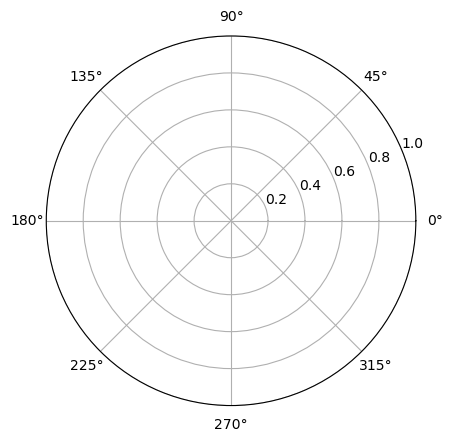

In [290]:
drifter_spectra_2d = spectra_2d_from_df(drifter_df.loc['SPOT-30102D'])#drifter id
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
plot_2d_energy_density(ax, drifter_spectra_2d.sel(time='2023-08-30-T18:00', method='nearest'))#time stamp '2023-08-30-T06:00'